PROYECTO INTEGRADOR
ANALSIS DE DATOS BIOGENISIS

In [39]:
import pandas as pd
import numpy as np
import os
import matplotlib as plt
import seaborn as sns


AVANCE 1
ETL: Extraccion, Transformacion y Descarga de datos procesados

In [40]:

# Leer el archivo CSV
df = pd.read_csv("C:/Users/sdcav/Downloads/data_latinoamerica.csv", sep=',')


# Hacemos una exploracion por los datos para recoonocer su volumen, caracteristicas, tipo.

In [21]:
# se imprimen los primeros datos
df.head()

location_key        date country_code country_name  new_confirmed  \
0           AR  2020-01-01           AR    Argentina            3.0   
1           AR  2020-01-02           AR    Argentina           14.0   
2           AR  2020-01-03           AR    Argentina            3.0   
3           AR  2020-01-04           AR    Argentina            7.0   
4           AR  2020-01-05           AR    Argentina            5.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0           0.0                   3.0                  0.0   
1           0.0                  17.0                  0.0   
2           0.0                  20.0                  0.0   
3           0.0                  27.0                  0.0   
4           0.0                  32.0                  0.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                    NaN  44938712.0  ...   
1                                    NaN  44938712.0  ...   
2                                    NaN  44938712.0  ...   
3                                    NaN  44938712.0  ...   
4                                    NaN  44938712.0  ...   

   population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0               15057273.0         2690269.0           55032.0   
1               15057273.0         2690269.0           55032.0   
2               15057273.0         2690269.0           55032.0   
3               15057273.0         2690269.0           55032.0   
4               15057273.0         2690269.0           55032.0   

   life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0            76.52                    147.086                       79.483   
1            76.52                    147.086                       79.483   
2            76.52                    147.086                       79.483   
3            76.52                    147.086                       79.483   
4            76.52                    147.086                       79.483   

   pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
0                      26.6                        15.8            NaN   
1                      26.6                        15.8            NaN   
2                      26.6                        15.8            NaN   
3                      26.6                        15.8            NaN   
4                      26.6                        15.8            NaN   

   cumulative_recovered  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  

[5 rows x 50 columns]

In [22]:
np.shape(df)

(12216057, 50)

In [23]:
# Obtener el tamaño del DataFrame
tamano = df.shape

# Obtener el nombre de las columnas
columnas = df.columns

# Imprimir el tamaño y las columnas del DataFrame
print("Tamaño del DataFrame:", tamano)
print("Columnas", columnas)



Tamaño del DataFrame: (12216057, 50)
Columnas Index(['location_key', 'date', 'country_code', 'country_name', 'new_confirmed',
       'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
       'cumulative_vaccine_doses_administered', 'population',
       'population_male', 'population_female', 'population_rural',
       'population_urban', 'population_density', 'human_development_index',
       'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older', 'gdp_usd', 'gdp_per_capita_usd',
       'latitude', 'longitude', 'area_sq_km', 'smoking_prevalence',
       'diabetes_prevalence', 'infant_mortality_rate', 'nurses_per_1000',
       'physicians_per_1000', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'relative_humidity', 

# Se crea un grupo de paises sobre los cuales tratara el informe

In [41]:
#creo una lista con los paises seleccionados:
paises_seleccionados = ["Colombia", "Argentina", "Chile", "Mexico", "Peru" , "Brazil"]
#se crea un amascara por paises y 
data_latinoamerica = df[df["country_name"].isin(paises_seleccionados)]


In [42]:
#verifico cantidad de datos
np.shape(data_latinoamerica)


(11970289, 50)

# Como primer paso de limpieza de datos se verifican los datos nulos por columna.

In [43]:
#verifico cantidad de datos nulos por columna, con filtro para valores de mas de 4.000.000
data_latinoamerica.isnull().sum() [data_latinoamerica.isnull().sum()>4000000]

new_confirmed                             5620283
new_deceased                              5661788
cumulative_confirmed                      5619937
cumulative_deceased                       5661426
cumulative_vaccine_doses_administered    11706131
population_rural                         11964343
population_urban                         11964343
population_density                       11964343
human_development_index                   6472221
gdp_usd                                  11963352
gdp_per_capita_usd                       11962361
smoking_prevalence                       11964343
diabetes_prevalence                      11964343
infant_mortality_rate                    11964343
nurses_per_1000                          11964343
physicians_per_1000                      11964343
population_largest_city                  11964343
area_rural_sq_km                         11964343
area_urban_sq_km                         11964343
life_expectancy                          11964343


# Se ha detectado un importante volumen de datos nulos lo cual neceitamos transformar para poder seguir el analisis.

In [44]:
#como hay demasiados nulos se procede a la limpieza de los mismos

#se filtra la columna location_key para ver sus datos e identificar posibles duplicados
data_latinoamerica.location_key.value_counts()


location_key
AR              991
MX_GRO_12040    991
MX_GRO_12031    991
MX_GRO_12032    991
MX_GRO_12033    991
               ... 
BR_PR_411880    991
BR_PR_411885    991
BR_PR_411890    991
BR_PR_411900    991
PE_UCA_0401     991
Name: count, Length: 12079, dtype: int64

In [45]:
#vemos que hay datos duplicados cuando observamos la columna de country_code y las otras, por lo que filtramos datos por codigo de pais

data_latinoamerica_codigo = data_latinoamerica [data_latinoamerica["location_key"].isin(["AR","BR","CO","CL","MX","PE"])]

data_latinoamerica_codigo.shape

(5946, 50)

# Se pasa la columna date a tipo fecha

In [46]:
data_latinoamerica_codigo['date'] = pd.to_datetime(data_latinoamerica_codigo['date'])

C:\Users\sdcav\AppData\Local\Temp\ipykernel_9876\2127940423.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica_codigo['date'] = pd.to_datetime(data_latinoamerica_codigo['date'])


# Se ordena el data set por pais y fecha

In [47]:
# Ordenamos los datos previo a completar los acumulados de las vacunaciones

data_latinoamerica_codigo = data_latinoamerica_codigo.sort_values(by=['country_name', 'date'], ascending=True)


In [48]:
# filtramos los datos por fechas para trabajar con datos posteriores al 31/12/2020

data_codigo_fecha = data_latinoamerica_codigo [data_latinoamerica_codigo["date"] > "2020-12-31" ]

data_codigo_fecha.shape

(3750, 50)

# Avanzamos para lograr un data frame sin datos nulos

In [49]:
# Filtrar los valores nulos en el DataFrame 'data_codigo_fecha'
datos_nulos = data_codigo_fecha.isnull().sum()
valores_nulos = datos_nulos[datos_nulos > 0]

print("Cantidad de valores nulos por columna:")
print(valores_nulos)


Cantidad de valores nulos por columna:
new_confirmed                              21
new_deceased                               21
cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     589
average_temperature_celsius                42
minimum_temperature_celsius                41
maximum_temperature_celsius                41
rainfall_mm                                90
relative_humidity                          42
new_recovered                            2119
cumulative_recovered                     2740
dtype: int64


In [78]:
# Obtengo mediante una funcion la mediana, varianza y rango
def calculos_primarios (data):
    for i in data:
        if data[i].dtype == "float64" or data[i].dtype == "int64":
            print (i)
            print ("Mediana: ", data[i].median())
            print ("Moda: ", data[i].mode())
            print ("Varianza: ", data[i].var())
            print ("Maximo: ", data[i].max())
            print ("Minimo: ",data[i].min())
            print ("Rango: ",data[i].max() - data[i].min())
            print ("________________________")#Se imprime esta fila para dividir la infomracion por columnas y facilitar la legibilidad 
calculos_primarios (data_codigo_fecha)


new_confirmed
Mediana:  5164.0
Moda:  0    0.0
Name: new_confirmed, dtype: float64
Varianza:  588451049.3519927
Maximo:  298408.0
Minimo:  -573.0
Rango:  298981.0
________________________
new_deceased
Mediana:  100.0
Moda:  0    0.0
Name: new_deceased, dtype: float64
Varianza:  258274.30858559004
Maximo:  11447.0
Minimo:  0.0
Rango:  11447.0
________________________
cumulative_confirmed
Mediana:  3629796.0
Moda:  0     6093645.0
1     6095316.0
2     6099111.0
3     6103455.0
4     6109105.0
5     6117847.0
6     6131657.0
7     6151354.0
8     6175181.0
9     6198848.0
10    6223497.0
11    6247634.0
12    6265798.0
13    6278998.0
14    6286392.0
15    6293130.0
16    6299595.0
17    6302809.0
18    9313453.0
19    9341492.0
20    9367172.0
21    9394326.0
22    9426171.0
23    9465827.0
24    9507562.0
25    9560307.0
26    9602534.0
27    9633732.0
28    9658391.0
29    9678225.0
30    9689861.0
Name: cumulative_confirmed, dtype: float64
Varianza:  63931660739362.73
Maximo:  345688

# Inicio el proceso de transformacion con new_confirmed , new_deceased y new_recovered, como los considero datos muy sensibles y no tengo informacion adicional solo coloco zeros (0) como valor neutral.

In [50]:
# Crea un nuevo DataFrame llamado data_sin_nulos
data_sin_nulos = data_codigo_fecha.copy()

# Rellena los valores nulos con cero en las columnas 'new_confirmed' y 'new_deceased'
data_sin_nulos['new_confirmed'].fillna(0, inplace=True)
data_sin_nulos['new_deceased'].fillna(0, inplace=True)
data_sin_nulos['new_recovered'].fillna(0, inplace=True)


C:\Users\sdcav\AppData\Local\Temp\ipykernel_9876\3432105395.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_sin_nulos['new_confirmed'].fillna(0, inplace=True)
C:\Users\sdcav\AppData\Local\Temp\ipykernel_9876\3432105395.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

In [51]:
# Verifica si hay valores nulos en el DataFrame 'data_sin_nulos'
nulos_despues_de_eliminar = data_sin_nulos.isnull().sum()

# Imprime la cantidad de valores nulos por columna
print("Cantidad de valores nulos después de eliminar filas:")
print(nulos_despues_de_eliminar)


Cantidad de valores nulos después de eliminar filas:
location_key                                0
date                                        0
country_code                                0
country_name                                0
new_confirmed                               0
new_deceased                                0
cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     589
population                                  0
population_male                             0
population_female                           0
population_rural                            0
population_urban                            0
population_density                          0
human_development_index                     0
population_age_00_09                        0
population_age_10_19                        0
population_age_20_29                        0
population_age_30_39                        0
population_age_40_49       

# Completamos la columna de new_recovered con el promedio de cada pais.

In [52]:
# Calcula el promedio de 'new_recovered' por país
promedio_recuperados_por_pais = data_sin_nulos.groupby('country_name')['new_recovered'].mean()

# Rellena los valores nulos en 'new_recovered' con el promedio específico para cada país
for pais in data_sin_nulos['country_name'].unique():
    mask = (data_sin_nulos['country_name'] == pais)
    data_sin_nulos.loc[mask, 'new_recovered'].fillna(promedio_recuperados_por_pais[pais], inplace=True)

# Verifica si los valores nulos se han llenado correctamente
nulos_new_recovered = data_sin_nulos['new_recovered'].isnull().sum()
print("Cantidad de valores nulos en 'new_recovered' después de llenarlos:", nulos_new_recovered)


Cantidad de valores nulos en 'new_recovered' después de llenarlos: 0


# En el caso de cumulative para confirmed, deceased y recovered completamos considerando que el primer dato de cada pais es nulo por lo que se asigna el primer dato first_row [] de cada uno, y en segundo lugar se completa con el acumulado anterior utilizando cumsum()

In [53]:
# Verificación del primer dato
for pais in data_sin_nulos['country_name'].unique():
    mask = (data_sin_nulos['country_name'] == pais)
    first_row = data_sin_nulos.loc[mask].iloc[0]
    
    if pd.isnull(first_row['cumulative_confirmed']):
        data_sin_nulos.loc[mask, 'cumulative_confirmed'] = first_row['new_confirmed']
    
    if pd.isnull(first_row['cumulative_deceased']):
        data_sin_nulos.loc[mask, 'cumulative_deceased'] = first_row['new_deceased']
    
    if pd.isnull(first_row['cumulative_recovered']):
        data_sin_nulos.loc[mask, 'cumulative_recovered'] = first_row['new_recovered']

# Cálculo acumulativo para filas restantes
for pais in data_sin_nulos['country_name'].unique():
    mask = (data_sin_nulos['country_name'] == pais)
    data_sin_nulos.loc[mask, 'cumulative_confirmed'] = data_sin_nulos.loc[mask, 'new_confirmed'].cumsum()
    data_sin_nulos.loc[mask, 'cumulative_deceased'] = data_sin_nulos.loc[mask, 'new_deceased'].cumsum()
    data_sin_nulos.loc[mask, 'cumulative_recovered'] = data_sin_nulos.loc[mask, 'new_recovered'].cumsum()

# Verificación de valores nulos después de completar los datos
nulos_despues_de_eliminar = data_sin_nulos.isnull().sum()
print("Cantidad de valores nulos después de completar los datos:")
print(nulos_despues_de_eliminar)


Cantidad de valores nulos después de completar los datos:
location_key                               0
date                                       0
country_code                               0
country_name                               0
new_confirmed                              0
new_deceased                               0
cumulative_confirmed                       0
cumulative_deceased                        0
cumulative_vaccine_doses_administered    589
population                                 0
population_male                            0
population_female                          0
population_rural                           0
population_urban                           0
population_density                         0
human_development_index                    0
population_age_00_09                       0
population_age_10_19                       0
population_age_20_29                       0
population_age_30_39                       0
population_age_40_49                      

# Completamos la columna de datos de suministro de vacunas acumulado; en este caso se toma el dato anterior y, en el caso de que fuera el primer dato del subgrupo se toma el dato posterior. Des esta forma se da continuidad a la curva en la grafica.

In [54]:
# Reemplazar los valores nulos con el valor siguiente (forward fill)
sorted_data_sin_nulos['cumulative_vaccine_doses_administered'] = sorted_data_sin_nulos.groupby('country_name')['cumulative_vaccine_doses_administered'].fillna(method='ffill')

# Reemplazar los valores nulos restantes con el valor anterior (backward fill)
sorted_data_sin_nulos['cumulative_vaccine_doses_administered'] = sorted_data_sin_nulos.groupby('country_name')['cumulative_vaccine_doses_administered'].fillna(method='bfill')



C:\Users\sdcav\AppData\Local\Temp\ipykernel_9876\3969177490.py:2: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  sorted_data_sin_nulos['cumulative_vaccine_doses_administered'] = sorted_data_sin_nulos.groupby('country_name')['cumulative_vaccine_doses_administered'].fillna(method='ffill')
C:\Users\sdcav\AppData\Local\Temp\ipykernel_9876\3969177490.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sorted_data_sin_nulos['cumulative_vaccine_doses_administered'] = sorted_data_sin_nulos.groupby('country_name')['cumulative_vaccine_doses_administered'].fillna(method='ffill')
C:\Users\sdcav\AppData\Local\Temp\ipykernel_9876\3969177490.py:5: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future ver

In [55]:
# Verificación de valores nulos después de completar los datos
nulos_despues_de_eliminar = sorted_data_sin_nulos.isnull().sum()
print("Cantidad de valores nulos después de completar los datos:")
print(nulos_despues_de_eliminar)

Cantidad de valores nulos después de completar los datos:
location_key                              0
date                                      0
country_code                              0
country_name                              0
new_confirmed                             0
new_deceased                              0
cumulative_confirmed                      0
cumulative_deceased                       0
cumulative_vaccine_doses_administered     0
population                                0
population_male                           0
population_female                         0
population_rural                          0
population_urban                          0
population_density                        0
human_development_index                   0
population_age_00_09                      0
population_age_10_19                      0
population_age_20_29                      0
population_age_30_39                      0
population_age_40_49                      0
population_age_50_

# Se pasa a guardar el archivo en formato csv 

# Guardamos el archivo con un grado elevado de limpieza y transformacion para la siguiente etapa EDA

In [56]:
# Guardamos el dataset ya transformado

sorted_data_sin_nulos.to_csv("DatosLatinoamerica3.csv",sep= ',')

# INICIO AVANCE 2

In [28]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.interpolate as interpolate

# Leer el archivo CSV y almacenarlo en un DataFrame
df_Latam = pd.read_csv("DatosLatinoamerica3.csv")

# Verificamos que no haya datos duplicados.

In [29]:
print(df_Latam.duplicated().sum())


0


# Iniciamos el trabajo con una exploracion estadistica de las columnas

In [30]:
# Descripcion estadistica de cada columna
for i in df_Latam.columns:
    print (i)
    print (round(df_Latam[i].describe()),2)
    print ("_________________________________________________")

Unnamed: 0
count        3750.0
mean      5190545.0
std       3722907.0
min           366.0
25%        550683.0
50%       6296006.0
75%       7746334.0
max      10253876.0
Name: Unnamed: 0, dtype: float64 2
_________________________________________________
location_key
count     3750
unique       6
top         AR
freq       625
Name: location_key, dtype: object 2
_________________________________________________
date
count           3750
unique           625
top       2021-01-01
freq               6
Name: date, dtype: object 2
_________________________________________________
country_code
count     3750
unique       6
top         AR
freq       625
Name: country_code, dtype: object 2
_________________________________________________
country_name
count          3750
unique            6
top       Argentina
freq            625
Name: country_name, dtype: object 2
_________________________________________________
new_confirmed
count      3750.0
mean      13847.0
std       24212.0
min        -

# Se observan algunas inconsistencias como el tipo de dato objeto para la fecha o valores minimos negativos que deberian ser positivos. Procedemos a normalizar estos datos para mejorar la calidad de los mismos.

# Colocamos la fecha con formato tiempo, y lo reemplazamos por el indice numerico

In [37]:
print(df_Latam.index)
print(df_Latam.dtypes)

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2022-09-08', '2022-09-09', '2022-09-10', '2022-09-11',
               '2022-09-12', '2022-09-13', '2022-09-14', '2022-09-15',
               '2022-09-16', '2022-09-17'],
              dtype='datetime64[ns]', name='date', length=3750, freq=None)
Unnamed: 0                                 int64
location_key                              object
country_code                              object
country_name                              object
new_confirmed                            float64
new_deceased                             float64
cumulative_confirmed                     float64
cumulative_deceased                      float64
cumulative_vaccine_doses_administered    float64
population                               float64
population_male                          floa

In [36]:
df_Latam.columns

Index(['Unnamed: 0', 'location_key', 'country_code', 'country_name',
       'new_confirmed', 'new_deceased', 'cumulative_confirmed',
       'cumulative_deceased', 'cumulative_vaccine_doses_administered',
       'population', 'population_male', 'population_female',
       'population_rural', 'population_urban', 'population_density',
       'human_development_index', 'population_age_00_09',
       'population_age_10_19', 'population_age_20_29', 'population_age_30_39',
       'population_age_40_49', 'population_age_50_59', 'population_age_60_69',
       'population_age_70_79', 'population_age_80_and_older', 'gdp_usd',
       'gdp_per_capita_usd', 'latitude', 'longitude', 'area_sq_km',
       'smoking_prevalence', 'diabetes_prevalence', 'infant_mortality_rate',
       'nurses_per_1000', 'physicians_per_1000', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'relative_humidity', 'population_largest_city',
       'area_

In [38]:
# se verifica el cambio
print(df_Latam.index.dtype)

datetime64[ns]


In [7]:
print(df_Latam.index)

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2022-09-08', '2022-09-09', '2022-09-10', '2022-09-11',
               '2022-09-12', '2022-09-13', '2022-09-14', '2022-09-15',
               '2022-09-16', '2022-09-17'],
              dtype='datetime64[ns]', name='date', length=3750, freq=None)


# Se pasan a positivos los valores negativos de new_confirmed, new_deceased y new_recovered

In [39]:
# Asumo que hay errores en datos negativos que deberian ser positivos por tanto los convierto para que no afecte los calculos estadisticos.
# con las columnas "new_confirmed", "new_deceased" y "new_recovered"

# Convierte los valores negativos a positivos en las columnas
df_Latam['new_confirmed'] = df_Latam['new_confirmed'].abs()
df_Latam['new_deceased'] = df_Latam['new_deceased'].abs()
df_Latam['new_recovered'] = df_Latam['new_recovered'].abs()

# Ahora los valores deberían ser positivos en las columnas especificadas


# Realizo una segunda exploracion descriptiva de las columnas pero esta vez solo con algunos calculos estadisticos .

In [40]:
# Obtengo mediante una funcion la mediana, varianza y rango
def calculos_primarios (data):
    for i in data:
        if data[i].dtype == "float64" or data[i].dtype == "int64":
            print (i)
            print ("Mediana: ", data[i].median())
            print ("Moda: ", data[i].mode())
            print ("Varianza: ", data[i].var())
            print ("Maximo: ", data[i].max())
            print ("Minimo: ",data[i].min())
            print ("Rango: ",data[i].max() - data[i].min())
            print ("________________________")#Se imprime esta fila para dividir la infomracion por columnas y facilitar la legibilidad 
calculos_primarios (df_Latam)


Unnamed: 0
Mediana:  6296005.5
Moda:  0            366
1            367
2            368
3            369
4            370
          ...   
3745    10253872
3746    10253873
3747    10253874
3748    10253875
3749    10253876
Name: Unnamed: 0, Length: 3750, dtype: int64
Varianza:  13860037278056.146
Maximo:  10253876
Minimo:  366
Rango:  10253510
________________________
new_confirmed
Mediana:  5102.0
Moda:  0    0.0
Name: new_confirmed, dtype: float64
Varianza:  586226395.4063854
Maximo:  298408.0
Minimo:  0.0
Rango:  298408.0
________________________
new_deceased
Mediana:  98.0
Moda:  0    0.0
Name: new_deceased, dtype: float64
Varianza:  257255.9058042145
Maximo:  11447.0
Minimo:  0.0
Rango:  11447.0
________________________
cumulative_confirmed
Mediana:  2876984.0
Moda:  0    4597637.0
Name: cumulative_confirmed, dtype: float64
Varianza:  34316623551669.492
Maximo:  26892860.0
Minimo:  727.0
Rango:  26892133.0
________________________
cumulative_deceased
Mediana:  90456.5
Moda:  0  

# Se observan falta de datos en las columnas rainfall y cumulative_recovered, en general se necesita explorar graficas para visualizar mas informacion.

In [42]:
# Armo una lista de paises para usar en los graficos

paises=['Argentina','Chile','Colombia','Mexico','Peru','Brazil']

# Aplicamos una verificacion de datos dado que hemos tenidos multiples problemas con los graficos y esta parece ser la solucion

In [56]:
import pandas as pd

# Reemplaza esta línea con la ubicación de tu archivo
file_path = "C:\\Users\\sdcav\\OneDrive\\Desktop\\Clase_Numpy\\DatosLatinoamerica3.csv"
df_Latam = pd.read_csv(file_path)

# Verificar duplicados en el DataFrame
df_Latam_cleaned = df_Latam.drop_duplicates()

# Convertir la columna de fecha a formato datetime
df_Latam_cleaned['date'] = pd.to_datetime(df_Latam_cleaned['date'])

# Establecer la columna de fecha como índice
df_Latam_cleaned.set_index('date', inplace=True)

# Verificar el tipo de índice
print(type(df_Latam_cleaned.index))  # Debería imprimir: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>

# Mostrar las primeras filas y la descripción de los datos
print(df_Latam_cleaned.head())
print(df_Latam_cleaned.describe())


<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
            Unnamed: 0 location_key country_code country_name  new_confirmed  \
date                                                                           
2021-01-01         366           AR           AR    Argentina         2685.0   
2021-01-02         367           AR           AR    Argentina         7767.0   
2021-01-03         368           AR           AR    Argentina         4934.0   
2021-01-04         369           AR           AR    Argentina        13953.0   
2021-01-05         370           AR           AR    Argentina        14085.0   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-01         140.0                2685.0                140.0   
2021-01-02         166.0               10452.0                306.0   
2021-01-03         157.0               15386.0                463.0   
2021-01-04         157.0      

Un primer acercamiento sera realizar una matriz de correlacion para ver si existe alguna relacion entre las variables

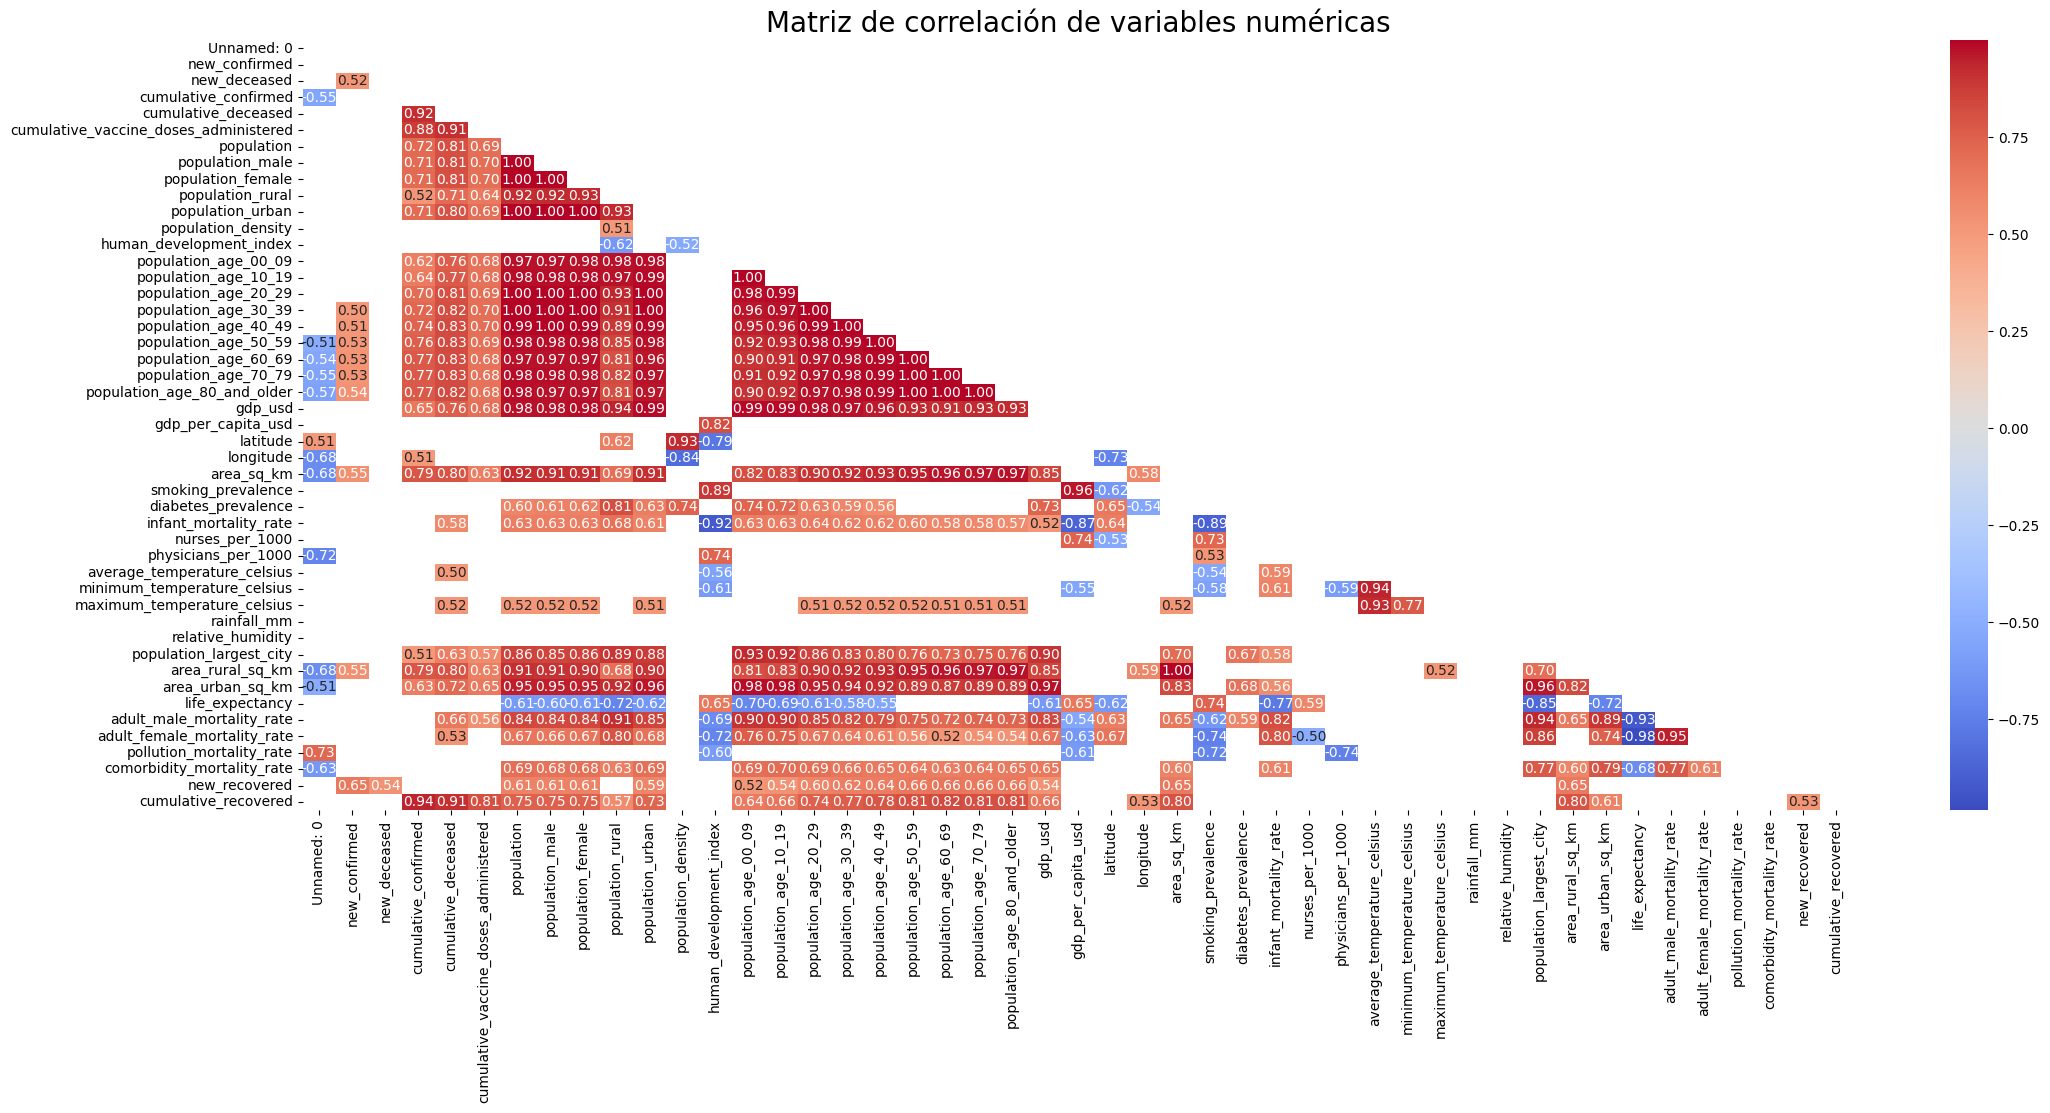

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create a correlation matrix of the numeric variables
numeric_columns = df_Latam_cleaned.select_dtypes(include=['float64','int64']).columns
correlation_matrix = df_Latam_cleaned[numeric_columns].corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Filter correlation values greater than 0.5
correlation_matrix = correlation_matrix[correlation_matrix.abs() > 0.5]

# Create the heatmap
plt.figure(figsize=(25, 10))
heatmap = sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de correlación de variables numéricas", fontsize=20)
plt.show()

# En una grafica de barras vemos la cantidad de nuevos casos en cada pais

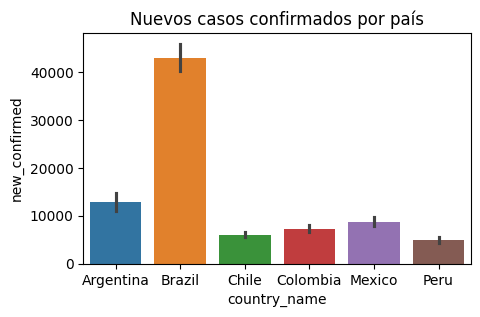

In [45]:
#import matplotlib.pyplot as plt
#import seaborn as sns

## Set the color palette for the countries
#colors = sns.color_palette("Set2", len(df_Latam['country_name'].unique()))

# Create the barplot with colored bars
fig, ax = plt.subplots(figsize=(5, 3))
sns.barplot(x='country_name', y='new_confirmed', data=df_Latam_cleaned, ax=ax, hue='country_name')
plt.title('Nuevos casos confirmados por país')
plt.show()

# Diagrama de barras para cada pais con 6 columnas que tienen informacion que me puede servir, exluyendo con un ciclo for las columnas que no me interesan en este paso

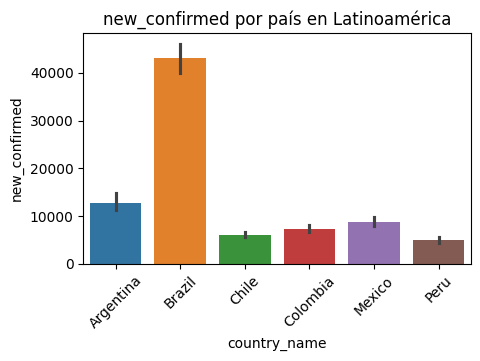

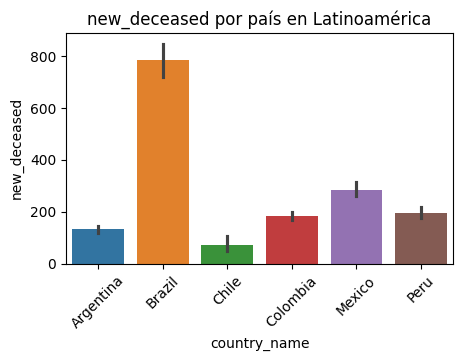

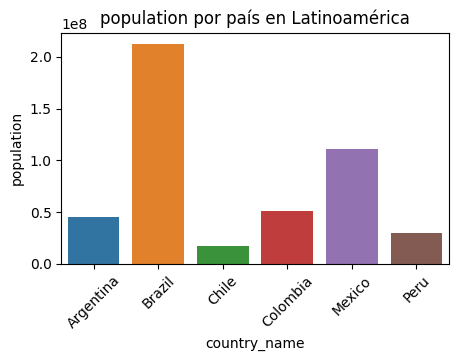

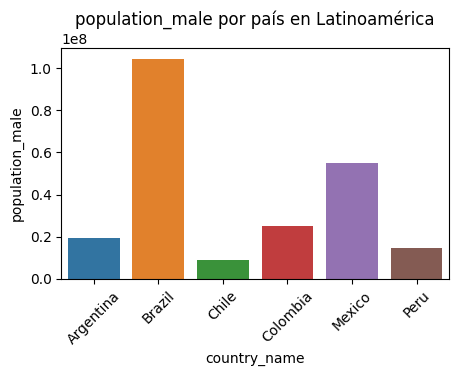

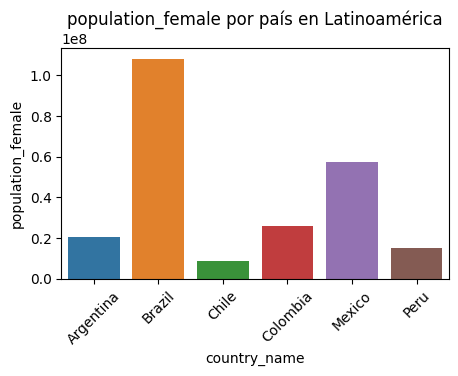

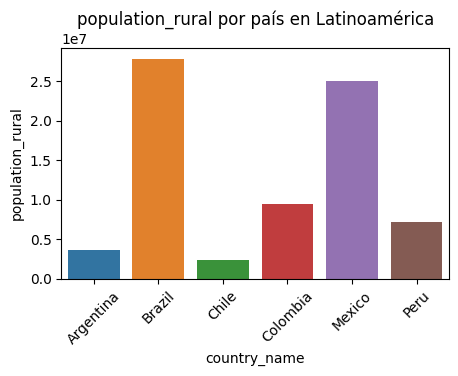

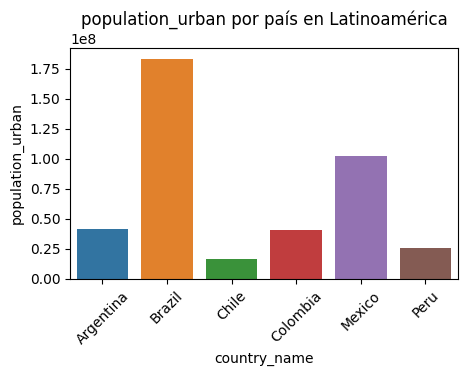

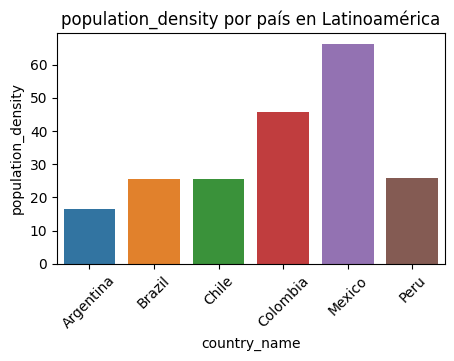

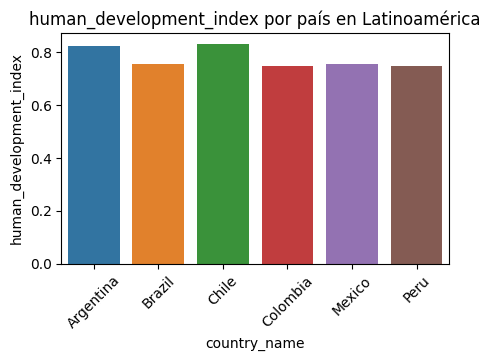

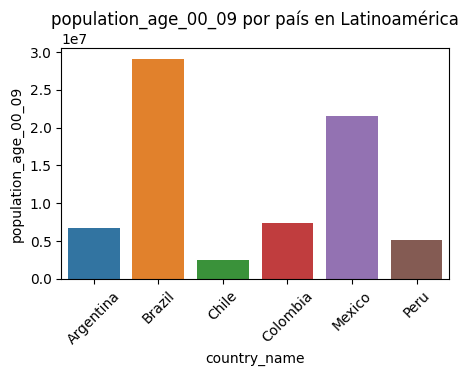

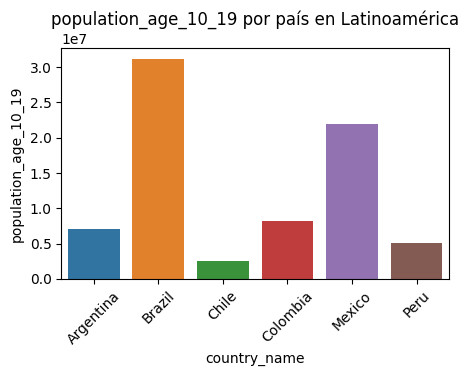

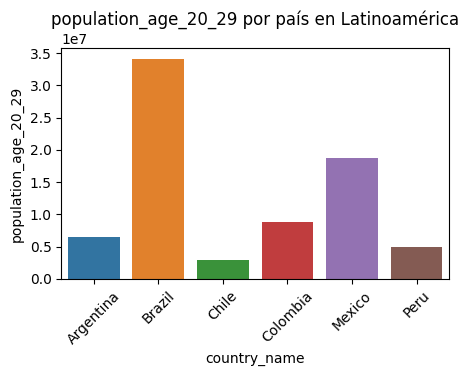

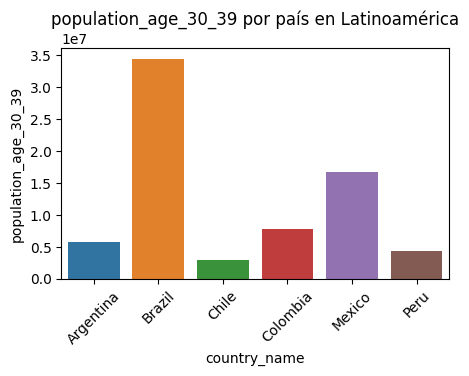

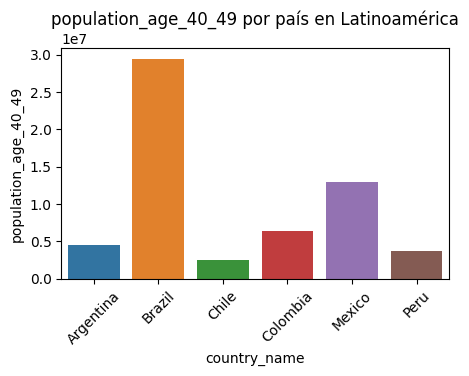

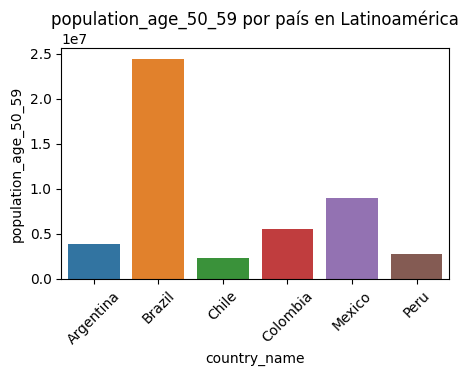

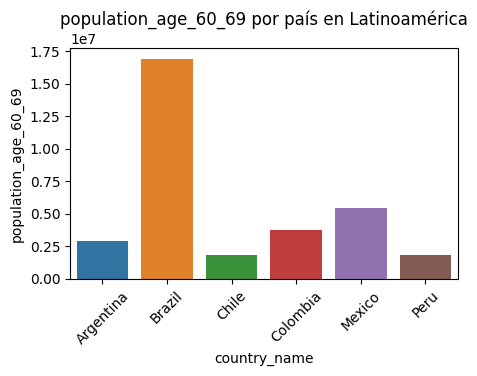

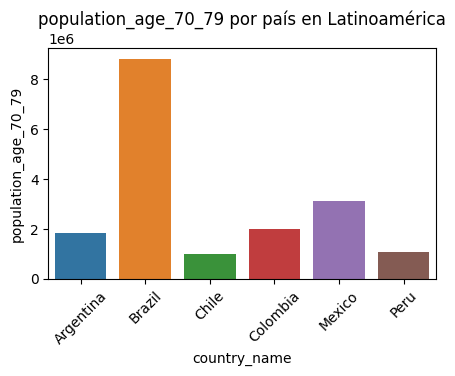

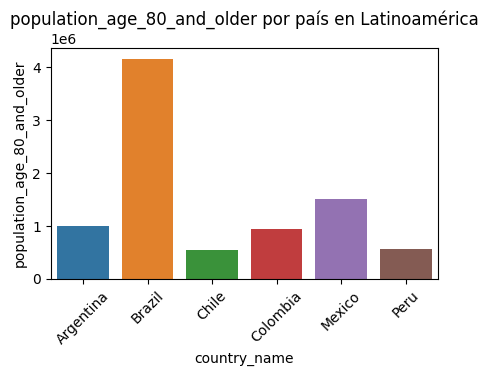

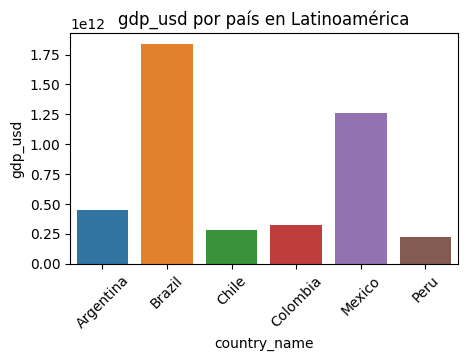

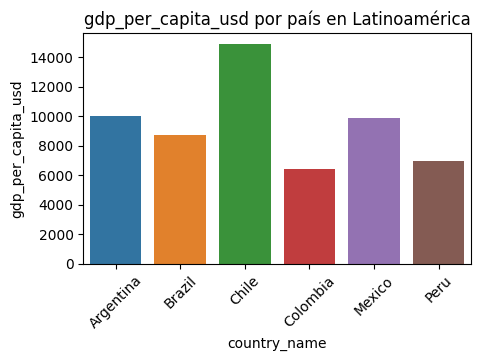

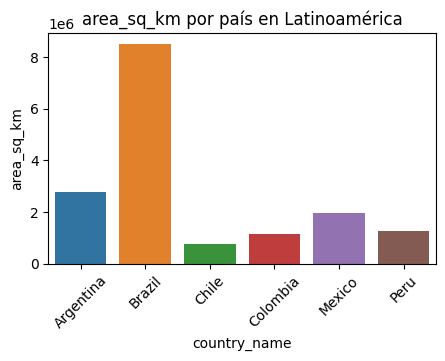

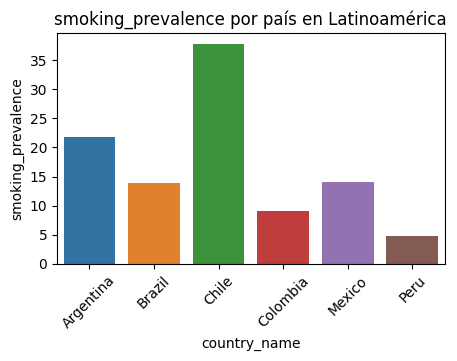

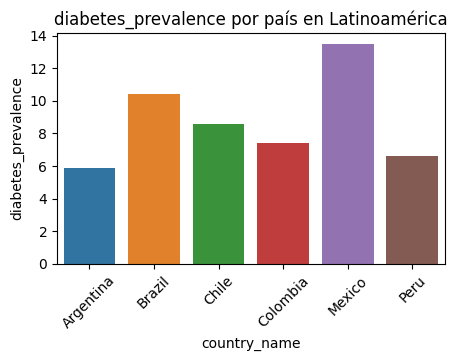

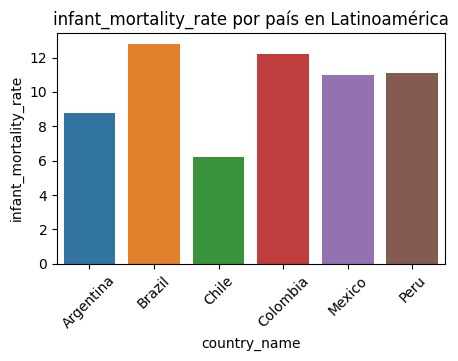

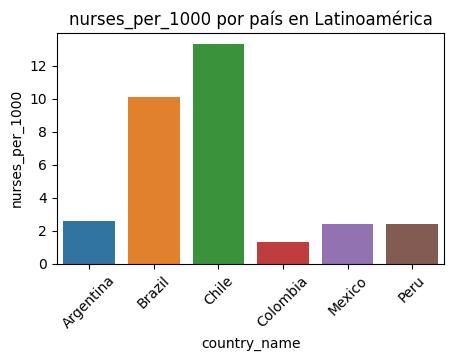

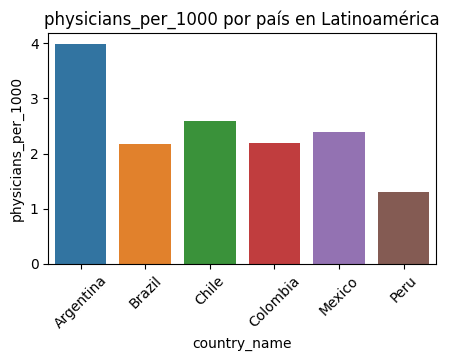

ValueError: cannot reindex on an axis with duplicate labels

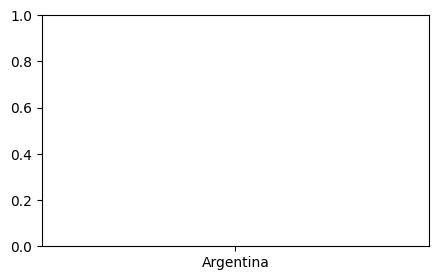

In [46]:

# Define las columnas de interés (excluyendo el índice)
#columns_of_interest = [col for col in df_Latam.columns if col not in [
 #   'location_key', 'country_code', 'country_name', 'latitude', 'longitude', 
  #  'cumulative_confirmed', 'cumulative_deceased', 'cumulative_recovered', 
   # 'cumulative_vaccine_doses_administered','Unnamed: 0']]

# Crea un gráfico de barras para cada columna de interés por país en Latinoamérica
#for col in columns_of_interest:
 #   plt.figure(figsize=(10, 6))
  #  sns.barplot(x='country_name', y=col, data=df_Latam, hue='country_name')
   # plt.title(f'{col} por país en Latinoamérica')
    #plt.xticks(rotation=45)
    #plt.show()

# Filtrar el DataFrame para incluir solo los países de la lista
df_paises = df_Latam_cleaned[df_Latam_cleaned['country_name'].isin(paises)]

for i in df_Latam_cleaned.columns:
    if i not in ['Unnamed: 0','location_key', 'date', 'country_code', 'country_name', 'latitude', 'longitude','cumulative_confirmed', 'cumulative_deceased', 'cumulative_recovered','cumulative_vaccine_doses_administered']
        fig, ax = plt.subplots(figsize=(5, 3))
        sns.barplot(x='country_name', y=i, data=df_Latam_cleaned, ax=ax, hue='country_name')
        plt.title(f'{i} por país en Latinoamérica')
        plt.xticks(rotation=45)
        plt.show()
                

Descripcion de los graficos con algunas observaciones relevantes:


Histogramas de nuevos confirmados, nuevos decesos, y las frecuencias relacionadas con las temperatura media, minima y maxima, en cada pais con lectura de probabilidades mediante uso de graficas de barras y linea kde.

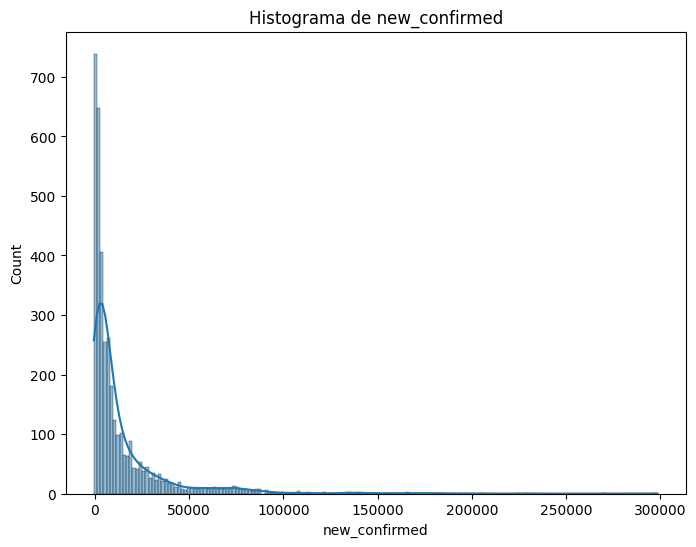

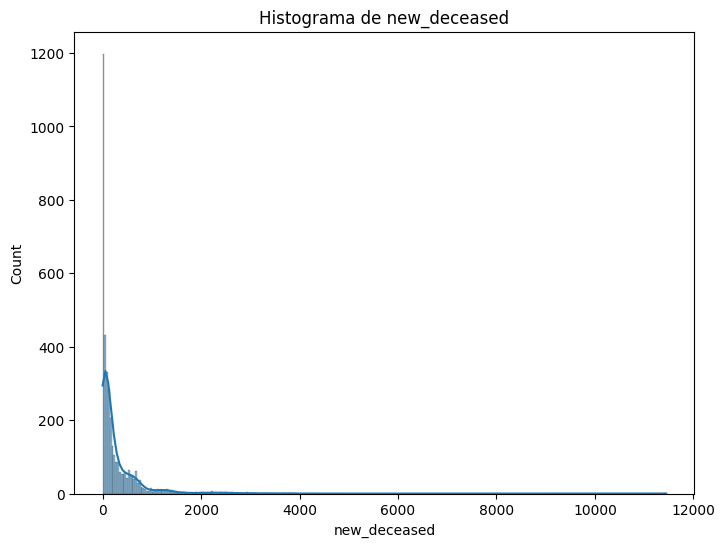

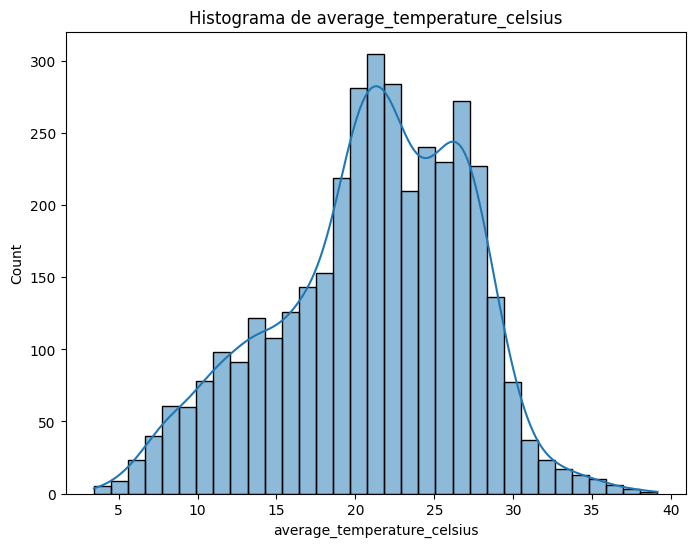

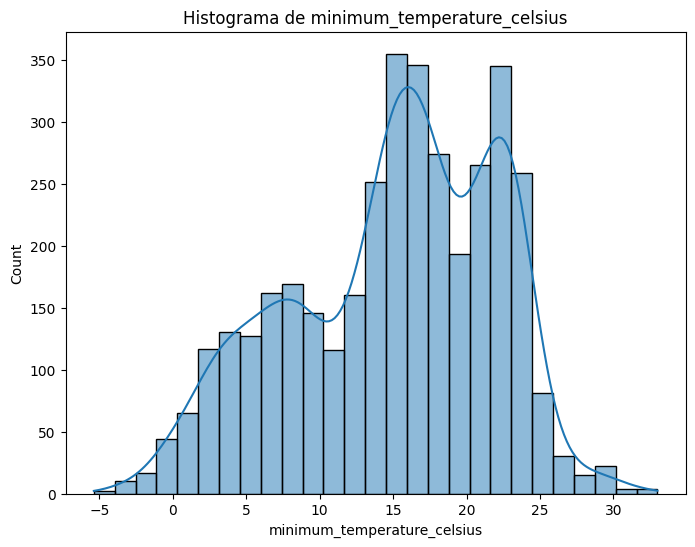

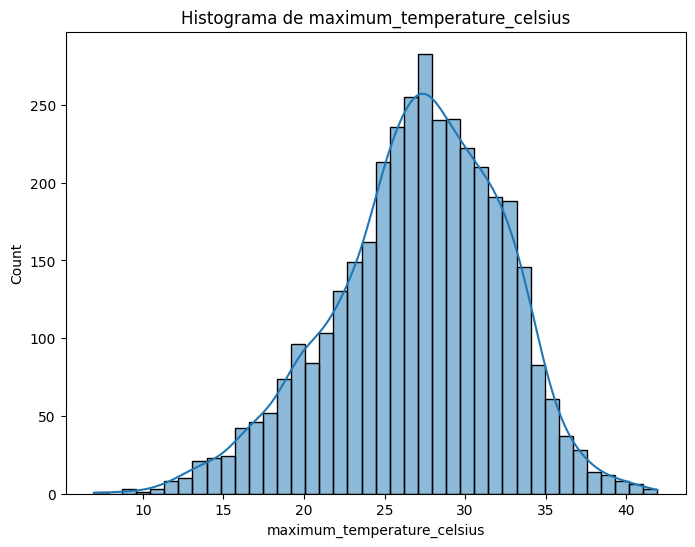

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de columnas numéricas de interés
lista_columnas_6 = ['new_confirmed', 'new_deceased', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_vaccine_doses_administered', 'average_temperature_celsius', 'minimum_temperature_celsius', 'maximum_temperature_celsius']

# Crear histogramas de las variables numéricas
for i in lista_columnas_6:
    if i not in ['location_key', 'country_code', 'date', 'country_name', 'latitude', 'longitude', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_recovered', 'cumulative_vaccine_doses_administered', 'new_recovered']:
        fig, ax = plt.subplots(figsize=(8, 6))
        sns.histplot(df_Latam, x=i, kde=True)
        plt.title(f'Histograma de {i}')
        plt.show()

Descripcion con observaciones en las probabilidades:

# Ahora analizaremos la dispersion de nuevos confirmados en relacion al promedio de temperatura para entender el comportamiento de los datos en relacion a la temperatura:

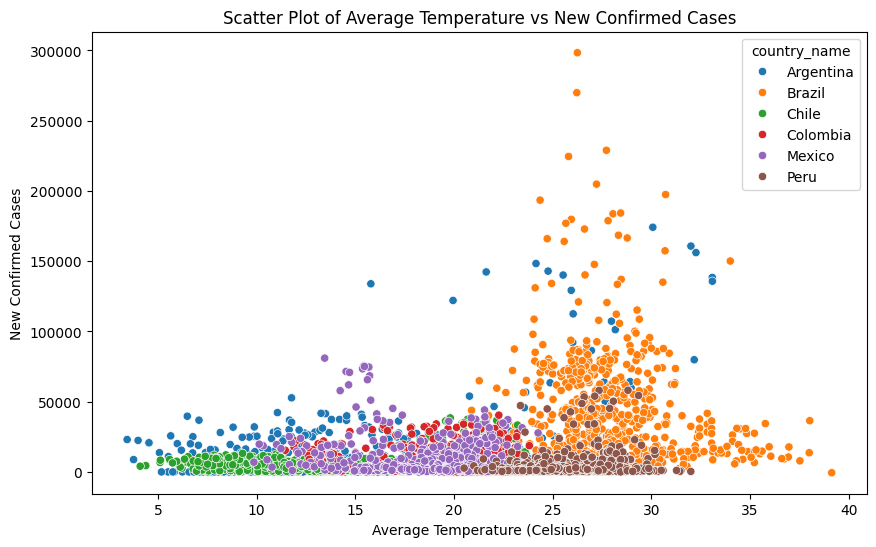

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of average_temperature_celsius vs new_confirmed
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='average_temperature_celsius', y='new_confirmed', data=df_Latam_cleaned, hue='country_name')
plt.title('Scatter Plot of Average Temperature vs New Confirmed Cases')
plt.xlabel('Average Temperature (Celsius)')
plt.ylabel('New Confirmed Cases')
plt.show()

Nuevamente utilizo la grafica skatter para ver la dispersion de los nuevos decesos y las temperaturas, pero ahora invierto los ejes.

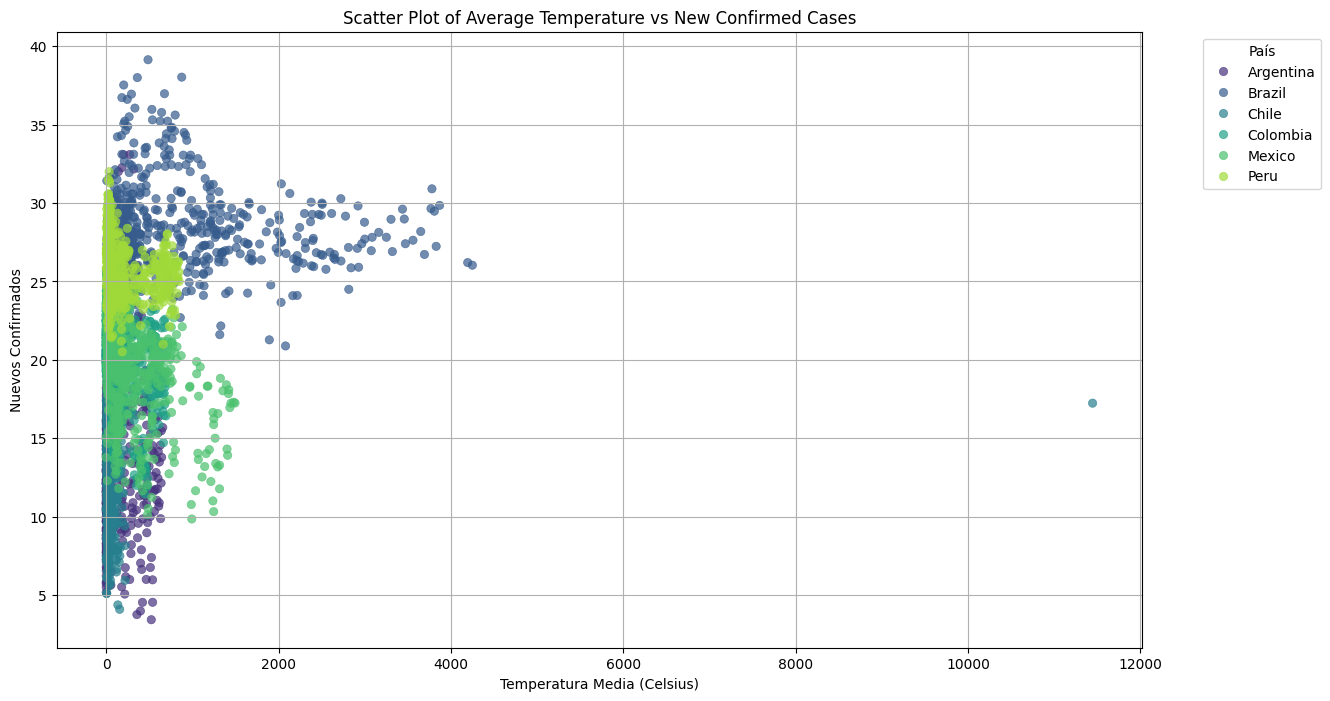

In [51]:
# Scatter plot of average_temperature_celsius vs new_confirmed
fig, ax = plt.subplots(figsize=(14, 8))
sns.scatterplot(y='average_temperature_celsius', x='new_deceased', data=df_Latam, hue='country_name', palette='viridis', alpha=0.7, edgecolor=None)
plt.title('Scatter Plot of Average Temperature vs New Confirmed Cases')
plt.xlabel('Temperatura Media (Celsius)')
plt.ylabel('Nuevos Confirmados')
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


Se observa un punto fuera de la escala normal. Se procedera a la busqueda y correccion.

Vamos a graficar los valores medios de dosis acumuladas de vacunacion de todos los paises

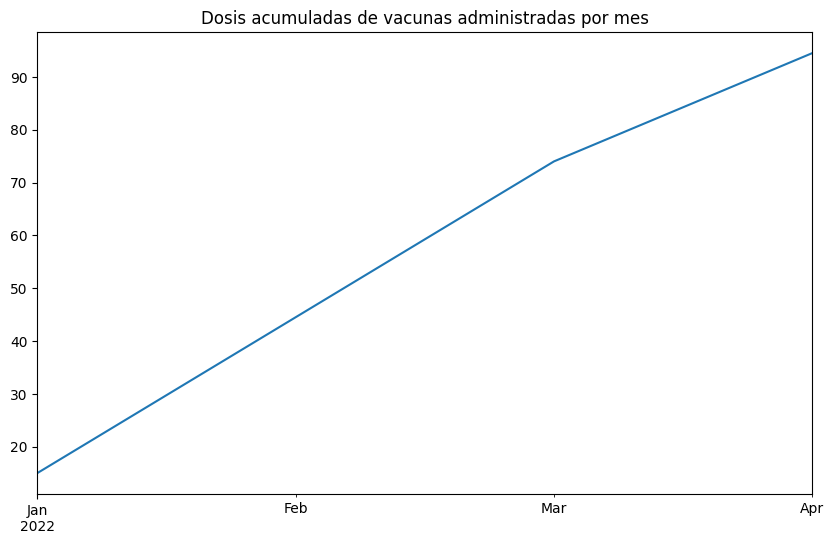

In [112]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear un DataFrame de ejemplo con un índice de tiempo
date_range = pd.date_range(start='2022-01-01', periods=100, freq='D')
data = {'cumulative_vaccine_doses_administered': range(100)}
df = pd.DataFrame(data, index=date_range)

# Crear la gráfica de valores medios por mes
fig, ax = plt.subplots(figsize=(10, 6))
df.resample('ME').mean()['cumulative_vaccine_doses_administered'].plot()
plt.title('Dosis acumuladas de vacunas administradas por mes')
plt.show()


C:\Users\sdcav\AppData\Local\Temp\ipykernel_9876\612414796.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  promedio_dosis = data_paises.groupby(['country_name', pd.Grouper(freq='M')])['cumulative_vaccine_doses_administered'].mean().reset_index()
C:\Users\sdcav\AppData\Local\Temp\ipykernel_9876\612414796.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='date', y='cumulative_vaccine_doses_administered', hue='country_name', data=promedio_dosis, ci=None)


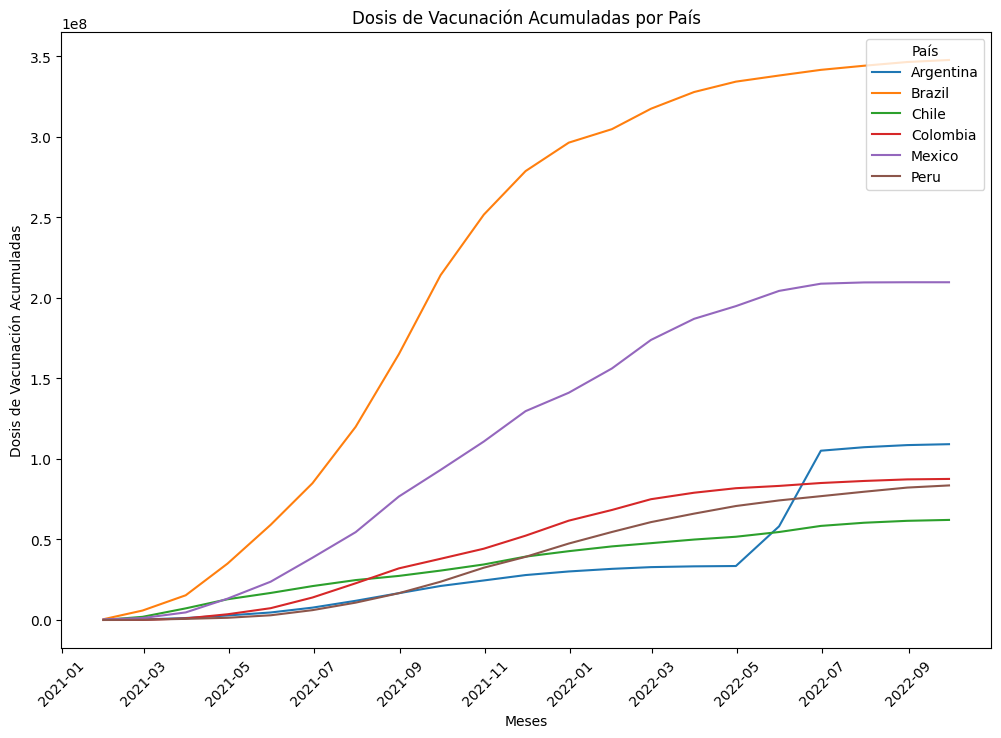

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar los datos para los países seleccionados
data_paises = df_Latam_cleaned[df_Latam_cleaned['country_name'].isin(paises)]

# Calcular el promedio diario de las dosis acumuladas para cada país
promedio_dosis = data_paises.groupby(['country_name', pd.Grouper(freq='M')])['cumulative_vaccine_doses_administered'].mean().reset_index()

# Crear el gráfico de líneas con datos no interpolados
plt.figure(figsize=(12, 8))
sns.lineplot(x='date', y='cumulative_vaccine_doses_administered', hue='country_name', data=promedio_dosis, ci=None)
plt.title('Dosis de Vacunación Acumuladas por País')
plt.xlabel('Meses')
plt.ylabel('Dosis de Vacunación Acumuladas')
plt.xticks(rotation=45)
plt.legend(title='País', loc='upper right')
plt.show()


In [114]:
print(type(df_Latam_cleaned.index))  # Debería imprimir: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>


<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


# Muertes por mes de cada pais

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


C:\Users\sdcav\AppData\Local\Temp\ipykernel_20800\2761395381.py:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_pais.resample('M').mean(numeric_only=True)['cumulative_deceased'].plot(ax=ax, label=pais)
C:\Users\sdcav\AppData\Local\Temp\ipykernel_20800\2761395381.py:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_pais.resample('M').mean(numeric_only=True)['cumulative_deceased'].plot(ax=ax, label=pais)
C:\Users\sdcav\AppData\Local\Temp\ipykernel_20800\2761395381.py:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_pais.resample('M').mean(numeric_only=True)['cumulative_deceased'].plot(ax=ax, label=pais)
C:\Users\sdcav\AppData\Local\Temp\ipykernel_20800\2761395381.py:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_pais.resample('M').mean(numeric_only=True)

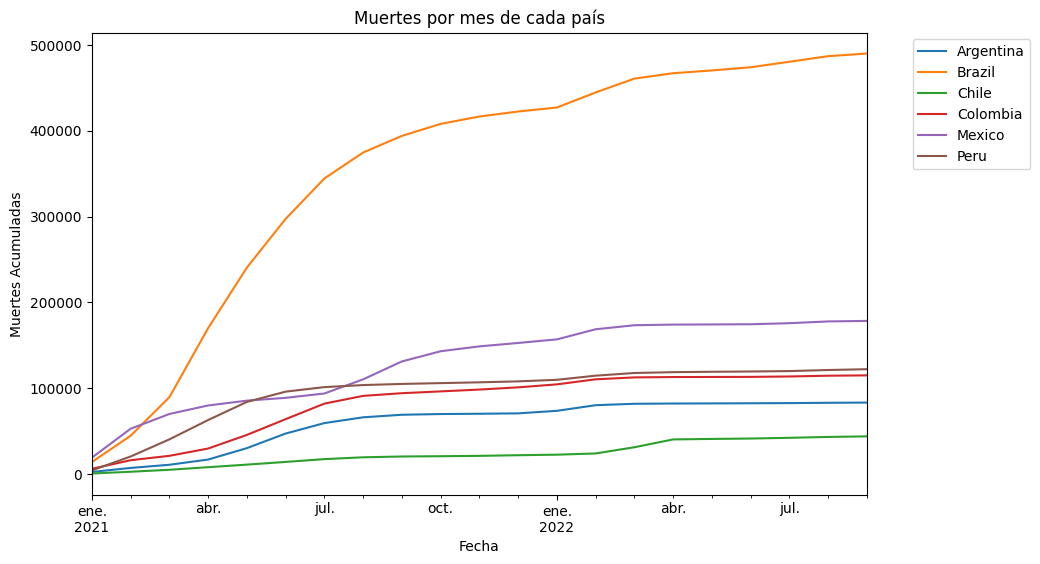

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegúrate de que estás utilizando el DataFrame limpio y con el índice de fecha
file_path = "C:\\Users\\sdcav\\OneDrive\\Desktop\\Clase_Numpy\\DatosLatinoamerica3.csv"
df_Latam = pd.read_csv(file_path)
df_Latam_cleaned = df_Latam.drop_duplicates()

# Convertir la columna de fecha a formato datetime
df_Latam_cleaned['date'] = pd.to_datetime(df_Latam_cleaned['date'])

# Establecer la columna de fecha como índice
df_Latam_cleaned.set_index('date', inplace=True)

# Asegúrate de que el índice es de tipo DatetimeIndex
print(type(df_Latam_cleaned.index))  # Debería imprimir: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>

# Lista de países
paises = df_Latam_cleaned['country_name'].unique()

# Crear gráfico
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises:
    df_pais = df_Latam_cleaned[df_Latam_cleaned['country_name'] == pais]
    df_pais.resample('M').mean(numeric_only=True)['cumulative_deceased'].plot(ax=ax, label=pais)

plt.title('Muertes por mes de cada país')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Fecha')
plt.ylabel('Muertes Acumuladas')
plt.show()


# Casos confirmados por mes por cada pais 

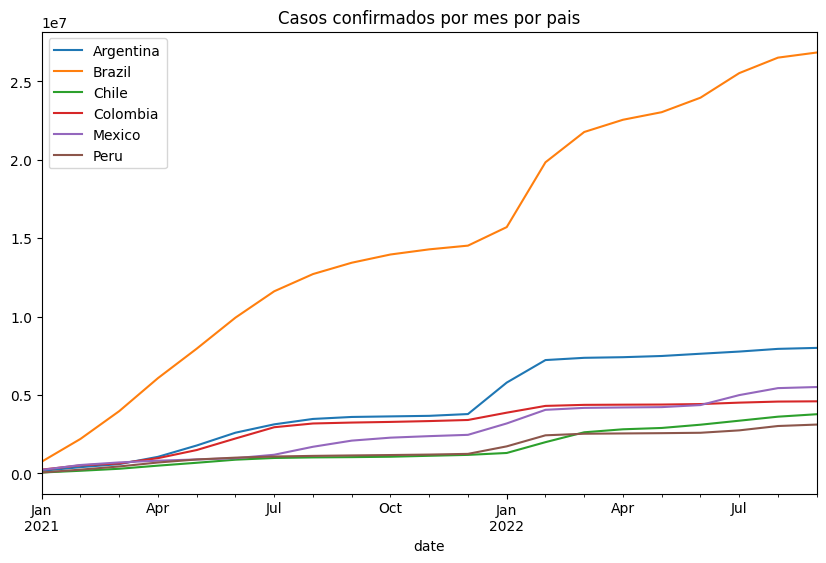

In [117]:
fig, ax = plt.subplots(figsize=(10,6))
for pais in paises:
    df_Latam_cleaned[df_Latam_cleaned['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_confirmed'].plot()
plt.title('Casos confirmados por mes por pais')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises)
plt.show()


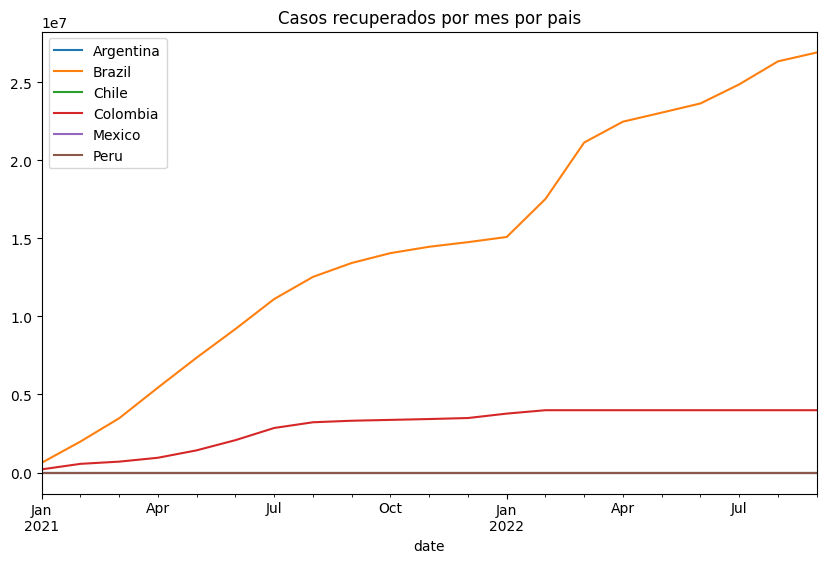

In [118]:
fig, ax = plt.subplots(figsize=(10,6))
for pais in paises:
    df_Latam_cleaned[df_Latam_cleaned['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_recovered'].plot()
plt.title('Casos recuperados por mes por pais')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises)
plt.show()


# Solo tenemos informacion de analisis de Brazil y parcial de Colombia

# Comparacion de numero de casos nuevos entre paises de America Latina

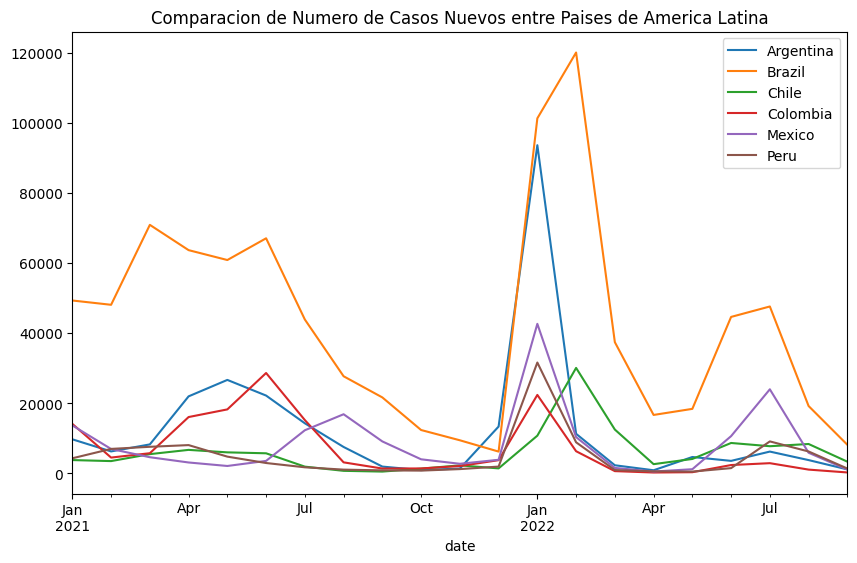

In [119]:
fig, ax=plt.subplots(figsize=(10, 6))
for pais in paises:
    df_Latam_cleaned[df_Latam_cleaned['country_name']==pais].resample('ME').mean(numeric_only=True)['new_confirmed'].plot()

plt.title('Comparacion de Numero de Casos Nuevos entre Paises de America Latina')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises)
plt.show()



# Llama la atencion el pico de argentina muy proximo en cantidad a Brasil pero con una poblacion considerablemente inferior

# Distribucion de dosis acumuladas por pais

Text(0.5, 1.0, 'Distribucion de dosis acumuladas por pais')

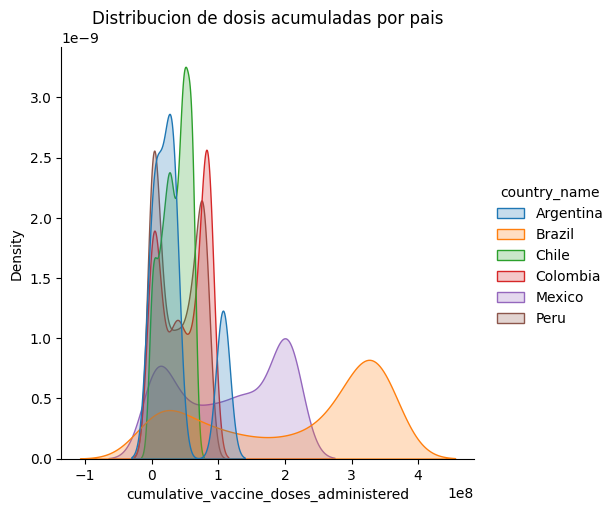

In [120]:
sns.displot(df_Latam_cleaned, x='cumulative_vaccine_doses_administered', hue="country_name", kind='kde', fill=True)
plt.title('Distribucion de dosis acumuladas por pais')

Brasil es de los paises con mayor probabilidad de administrar vacunas, colombia minimo

# Temperatura media por pais

In [12]:

%pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [20]:
import pandas as pd

# Reemplaza esta línea con la ubicación de tu archivo
file_path = "C:\\Users\\sdcav\\OneDrive\\Desktop\\Clase_Numpy\\DatosLatinoamerica3.csv"
df_Latam = pd.read_csv(file_path)

# Verificar duplicados en el DataFrame
df_Latam_cleaned = df_Latam.drop_duplicates()

# Convertir la columna de fecha a formato datetime
df_Latam_cleaned['date'] = pd.to_datetime(df_Latam_cleaned['date'])

# Establecer la columna de fecha como índice
df_Latam_cleaned.set_index('date', inplace=True)

# Verificar el tipo de índice
print(type(df_Latam_cleaned.index))  # Debería imprimir: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>

# Mostrar las primeras filas y la descripción de los datos
print(df_Latam_cleaned.head())
print(df_Latam_cleaned.describe())

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
            Unnamed: 0 location_key country_code country_name  new_confirmed  \
date                                                                           
2021-01-01         366           AR           AR    Argentina         2685.0   
2021-01-02         367           AR           AR    Argentina         7767.0   
2021-01-03         368           AR           AR    Argentina         4934.0   
2021-01-04         369           AR           AR    Argentina        13953.0   
2021-01-05         370           AR           AR    Argentina        14085.0   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-01         140.0                2685.0                140.0   
2021-01-02         166.0               10452.0                306.0   
2021-01-03         157.0               15386.0                463.0   
2021-01-04         157.0      

In [21]:
# Declaro nuevamente una lista de paises
paises = ['Argentina','Brazil','Colombia','Chile','Mexico','Peru']

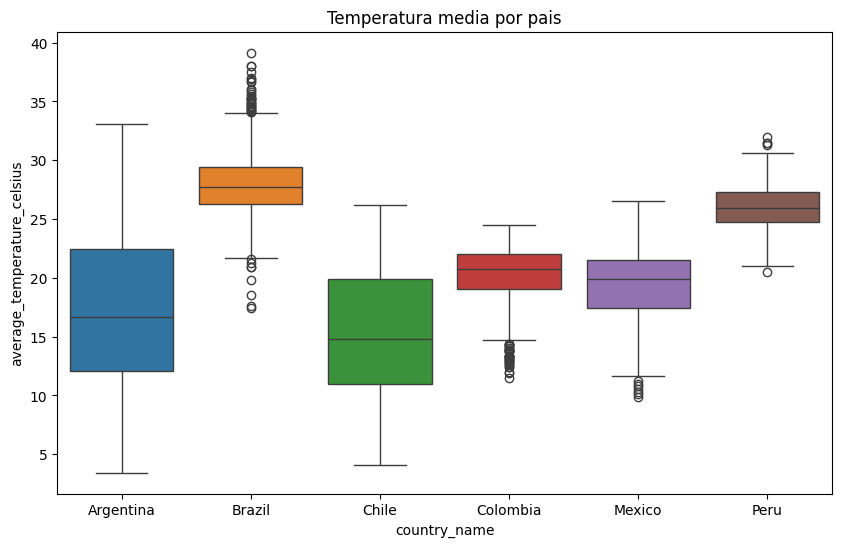

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el DataFrame desde el CSV
df_Latam = pd.read_csv("DatosLatinoamerica3.csv")

fig, ax= plt.subplots(figsize=(10,6))
sns.boxplot(x='country_name', y='average_temperature_celsius', data=df_Latam, hue='country_name')
plt.title('Temperatura media por pais')
plt.show()



# Realizo una grafica de violines para reconocer el comportamiento de violienes

# Evolucion semanal de nuevos confirmados

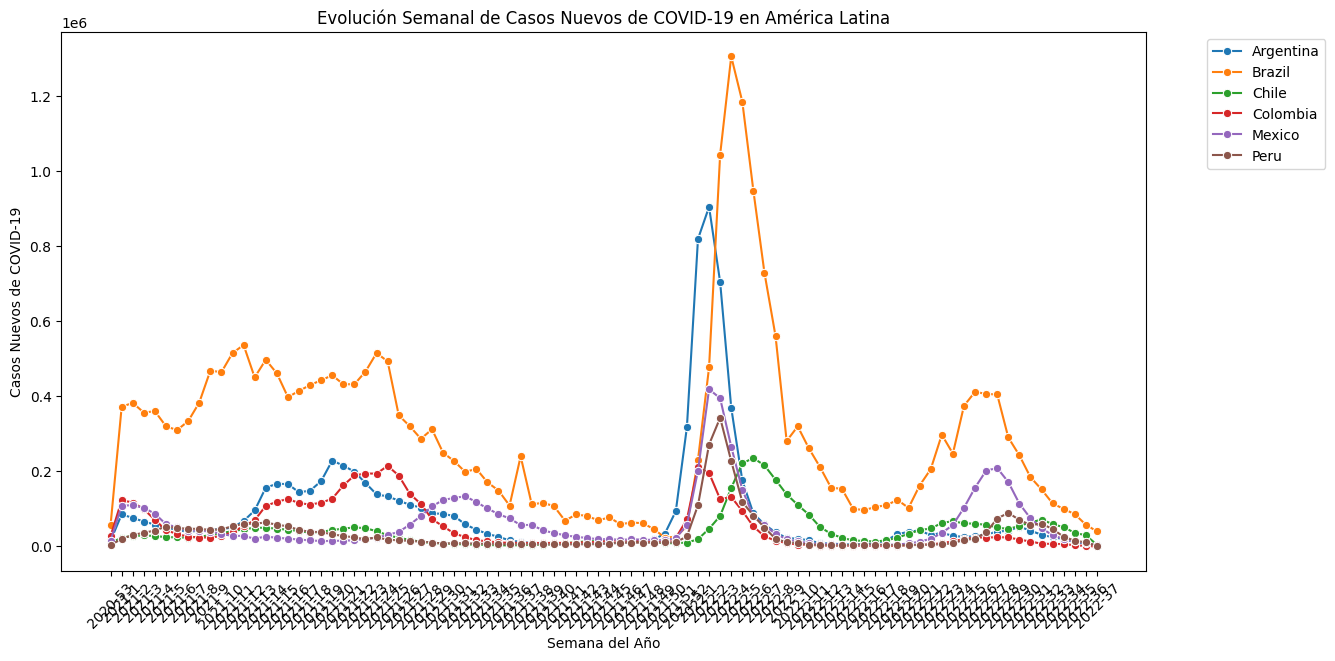

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.

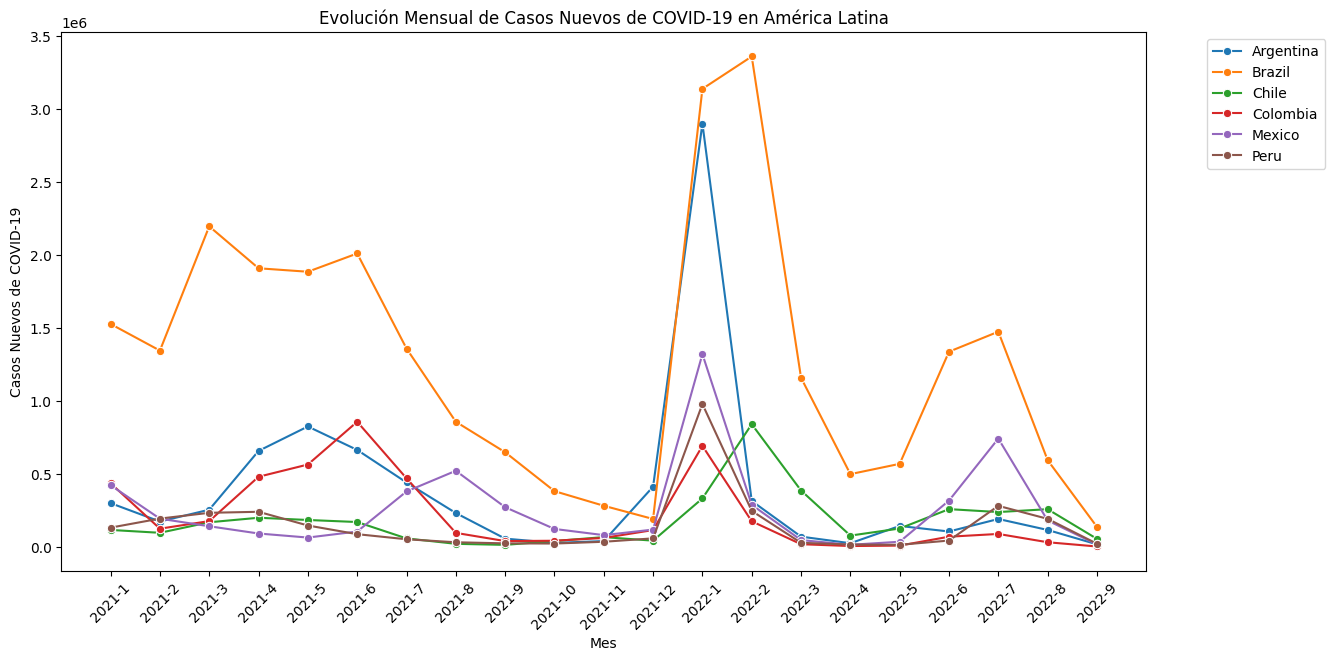

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el DataFrame desde el CSV
df_Latam = pd.read_csv("DatosLatinoamerica2.csv")

# Convertir la columna 'date' en tipo datetime
df_Latam['date'] = pd.to_datetime(df_Latam['date'])

# Evolución por semana
df_Latam['week'] = df_Latam['date'].dt.isocalendar().week
df_Latam['year'] = df_Latam['date'].dt.isocalendar().year
weekly_cases = df_Latam.groupby(['country_name', 'year', 'week'])['new_confirmed'].sum().reset_index()

# Crear una nueva columna 'week_year' para combinar semana y año
weekly_cases['week_year'] = weekly_cases['year'].astype(str) + '-' + weekly_cases['week'].astype(str)

plt.figure(figsize=(14, 7))
sns.lineplot(x='week_year', y='new_confirmed', hue='country_name', data=weekly_cases, marker='o')
plt.xlabel('Semana del Año')
plt.ylabel('Casos Nuevos de COVID-19')
plt.title('Evolución Semanal de Casos Nuevos de COVID-19 en América Latina')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Evolución por mes
df_Latam['month'] = df_Latam['date'].dt.month
df_Latam['year'] = df_Latam['date'].dt.year
monthly_cases = df_Latam.groupby(['country_name', 'year', 'month'])['new_confirmed'].sum().reset_index()

# Crear una nueva columna 'month_year' para combinar mes y año
monthly_cases['month_year'] = monthly_cases['year'].astype(str) + '-' + monthly_cases['month'].astype(str)

plt.figure(figsize=(14, 7))
sns.lineplot(x='month_year', y='new_confirmed', hue='country_name', data=monthly_cases, marker='o')
plt.xlabel('Mes')
plt.ylabel('Casos Nuevos de COVID-19')
plt.title('Evolución Mensual de Casos Nuevos de COVID-19 en América Latina')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# Grafica de violiones en los 6 paises

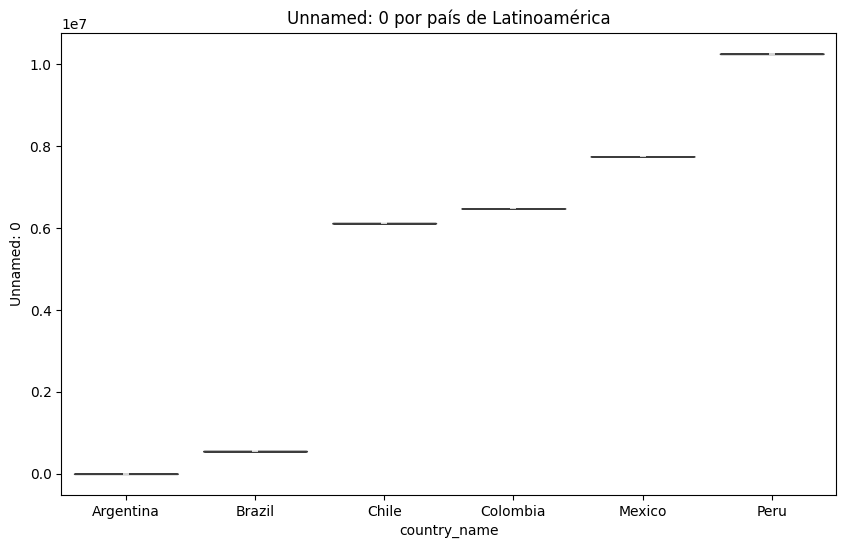

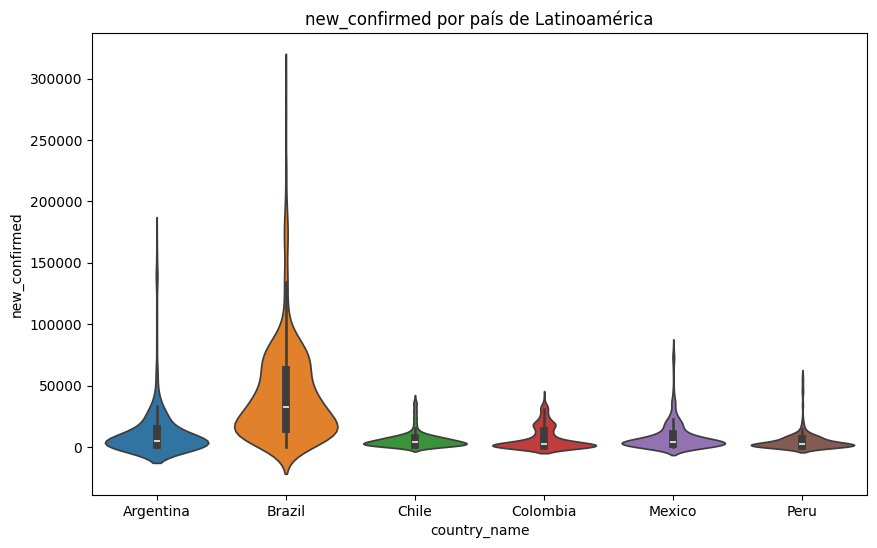

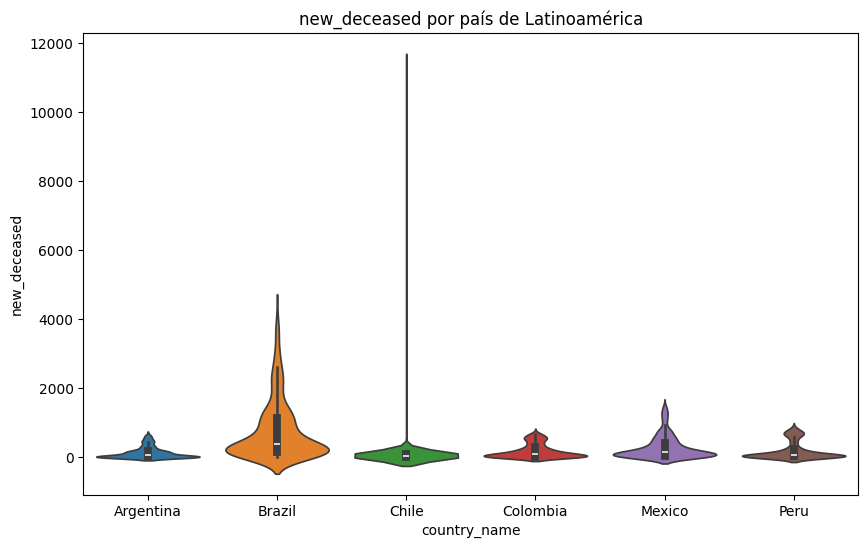

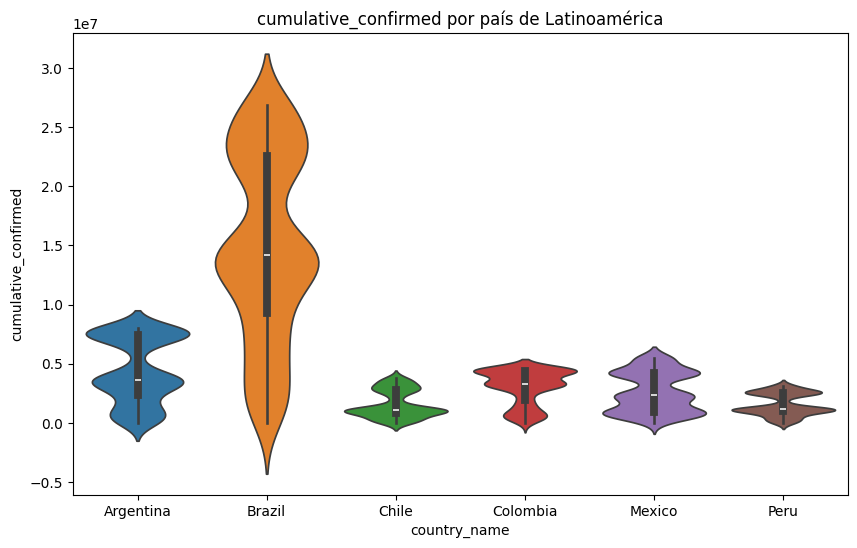

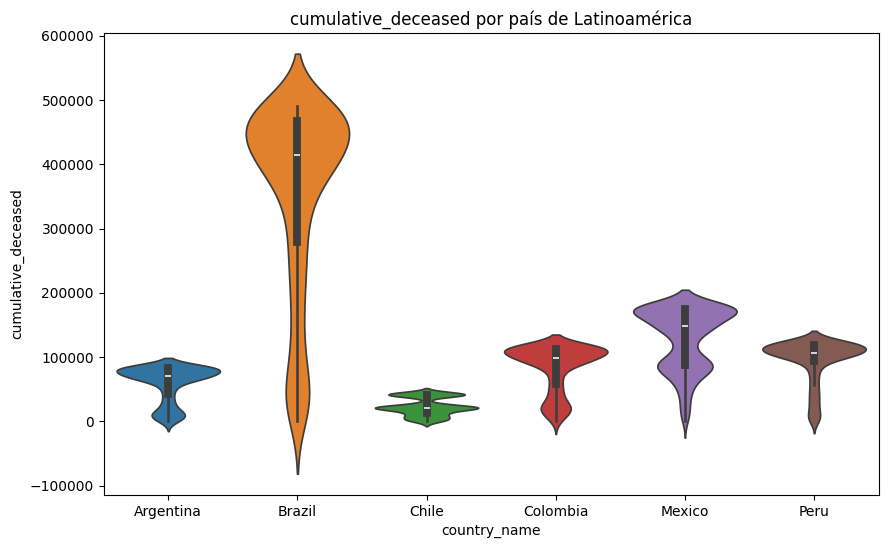

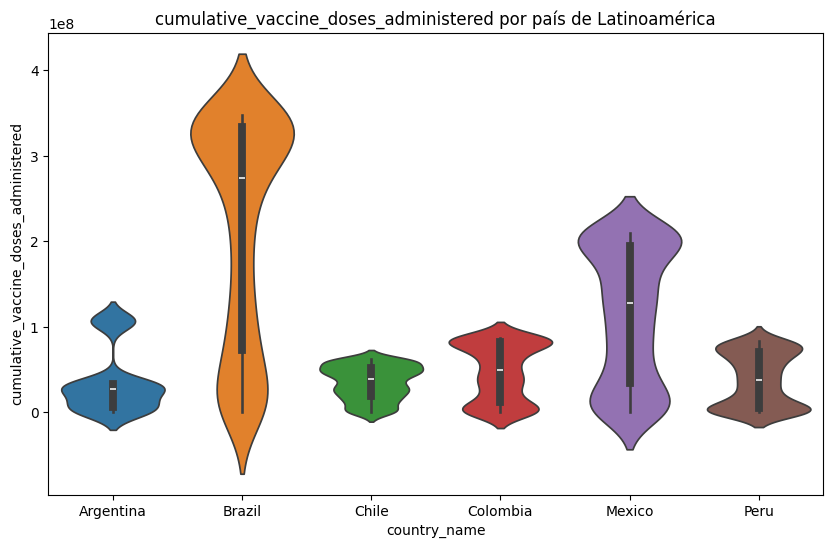

ValueError: cannot reindex on an axis with duplicate labels

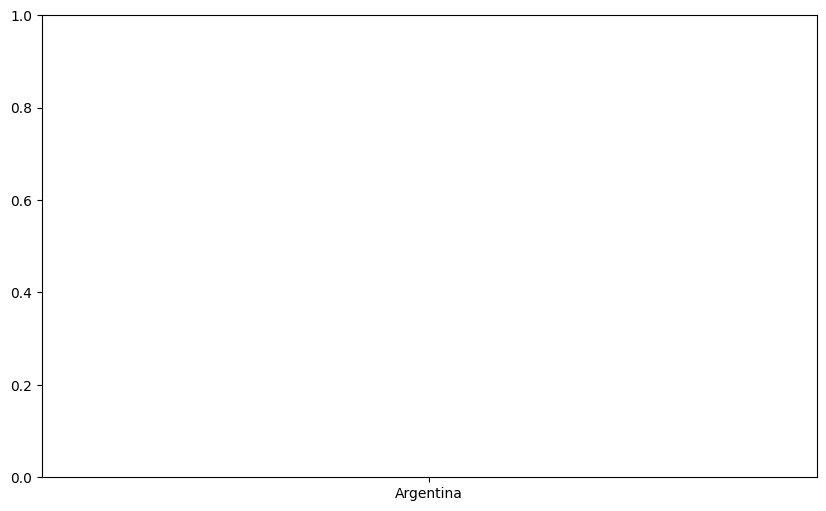

In [32]:
# Se crea un dataframe con las columnas mayores a 6 porque son las que tienen valores diferentes para cada país
columnas_mayores_6 = []
for i in df_Latam_cleaned.columns:
    if i not in ['location_key', 'date', 'country_code', 'latitude', 'longitude']:
        if df_Latam_cleaned[i].nunique() > 6:
            columnas_mayores_6.append(i)

# Agregar la columna 'country_name' a columnas_mayores_6 para poder hacer análisis por país.
columnas_mayores_6.append('country_name')

# Se crea un dataframe con las columnas mayores a 6
df_Latam_mayores_6 = df_Latam_cleaned[columnas_mayores_6]

# Violinplot en todos los países para variables numéricas
for i in df_Latam_mayores_6:
    if i not in ['location_key', 'date', 'country_code', 'latitude', 'longitude', 'country_name']:
        fig, ax = plt.subplots(figsize=(10, 6))
        sns.violinplot(x='country_name', y=i, data=df_Latam_mayores_6, hue='country_name')
        plt.title(f'{i} por país de Latinoamérica')
        plt.show()



#En los datos de Chile de decesos de Chile del 2022-03-2 se ha encontrado un dato muy atipico y se lo considera erroneo por lo que se lo reemplaza por el promedio en la columna new_deceased


In [75]:
# Calcular el promedio de decesos para Chile
promedio_decesos_chile = df_Latam_cleaned[df_Latam_cleaned['country_name'] == 'Chile']['new_deceased'].mean()

# Cambiar el valor específico
fecha = '2022-03-02'
df_Latam_cleaned.loc[(df_Latam_cleaned.index == fecha) & (df_Latam_cleaned['country_name'] == 'Chile'), 'new_deceased'] = promedio_decesos_chile


# aplicamos nuevamente la figura de violin a todos los paises

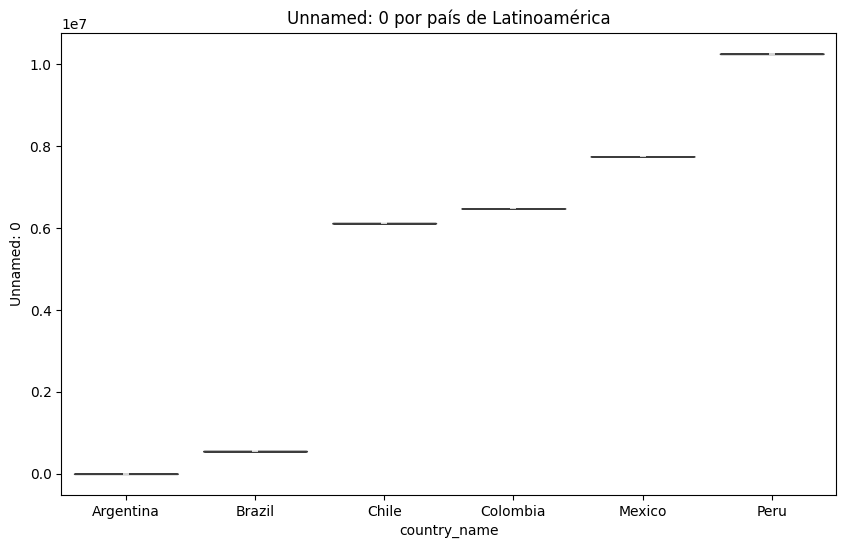

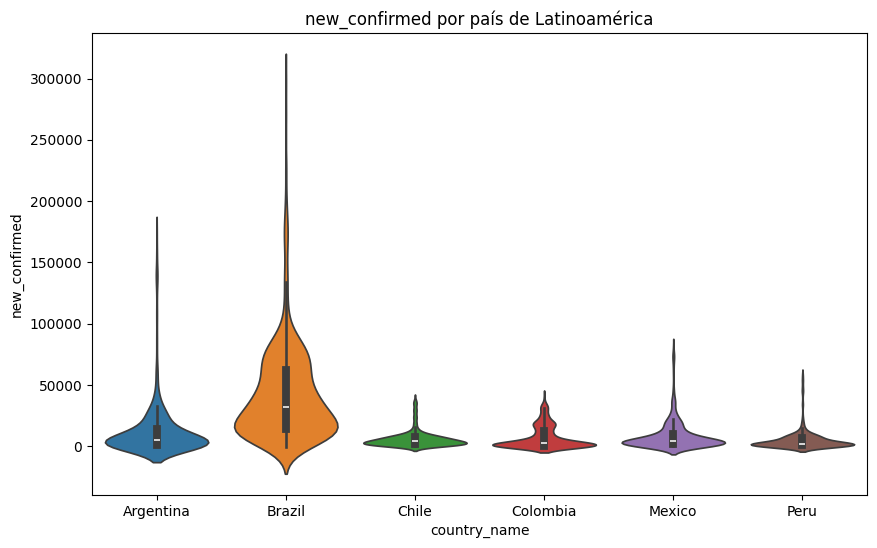

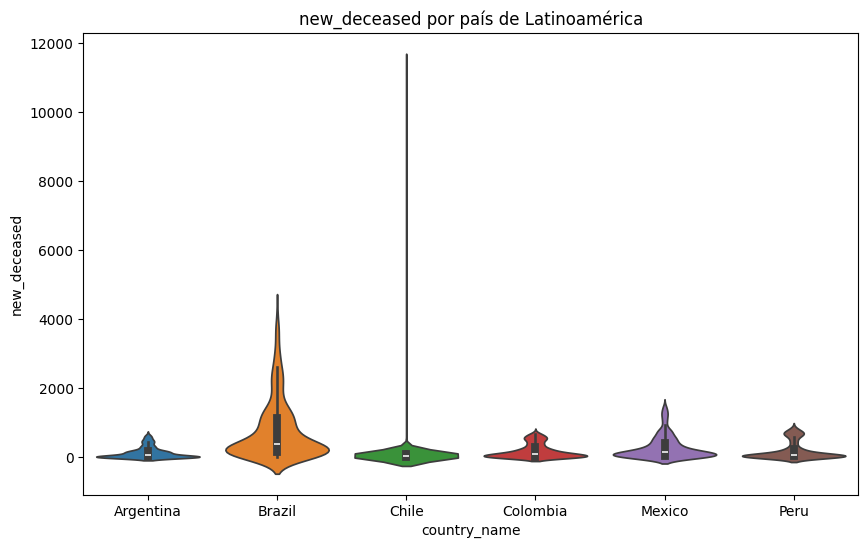

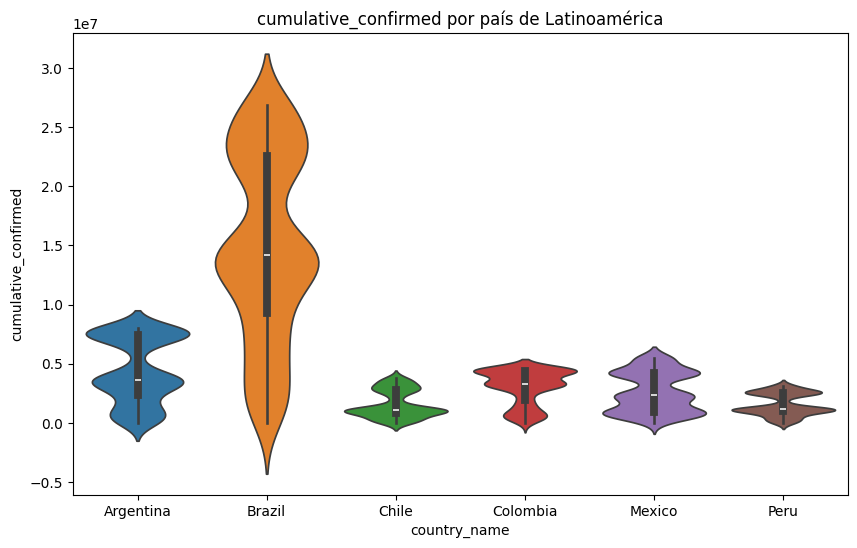

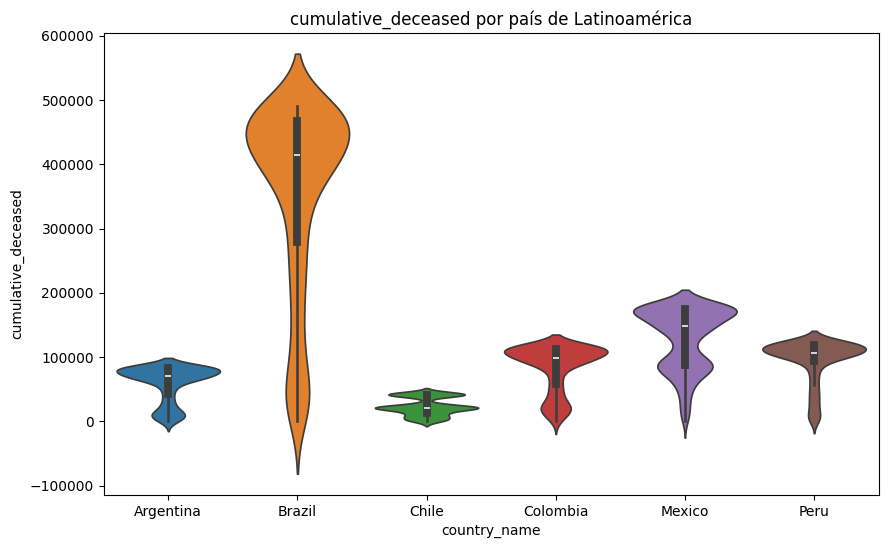

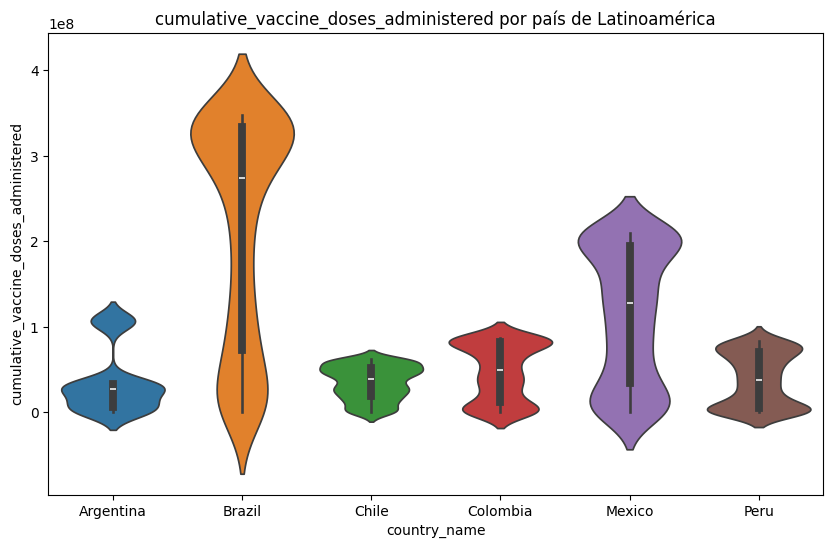

ValueError: cannot reindex on an axis with duplicate labels

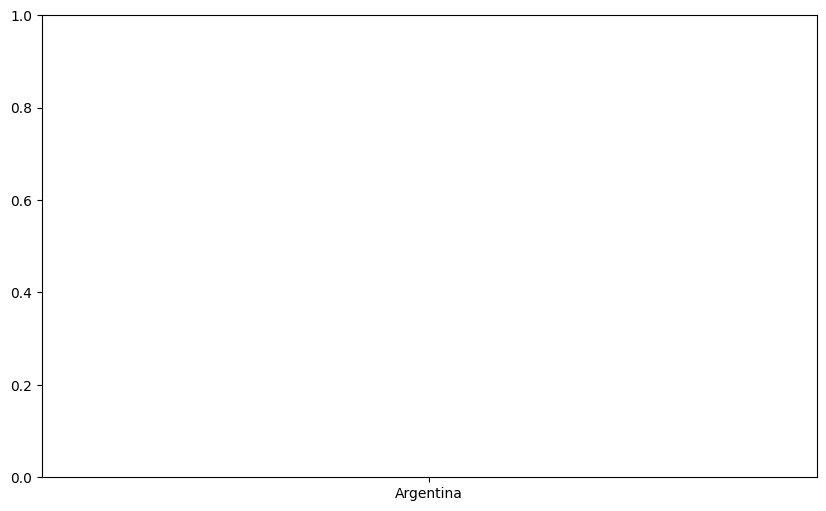

In [76]:
# Se crea un dataframe con las columnas mayores a 6 porque son las que tienen valores diferentes para cada país
columnas_mayores_6 = []
for i in df_Latam_cleaned.columns:
    if i not in ['location_key', 'date', 'country_code', 'latitude', 'longitude']:
        if df_Latam_cleaned[i].nunique() > 6:
            columnas_mayores_6.append(i)

# Agregar la columna 'country_name' a columnas_mayores_6 para poder hacer análisis por país.
columnas_mayores_6.append('country_name')

# Se crea un dataframe con las columnas mayores a 6
df_Latam_mayores_6 = df_Latam_cleaned[columnas_mayores_6]

# Violinplot en todos los países para variables numéricas
for i in df_Latam_mayores_6:
    if i not in ['location_key', 'date', 'country_code', 'latitude', 'longitude', 'country_name']:
        fig, ax = plt.subplots(figsize=(10, 6))
        sns.violinplot(x='country_name', y=i, data=df_Latam_mayores_6, hue='country_name')
        plt.title(f'{i} por país de Latinoamérica')
        plt.show()


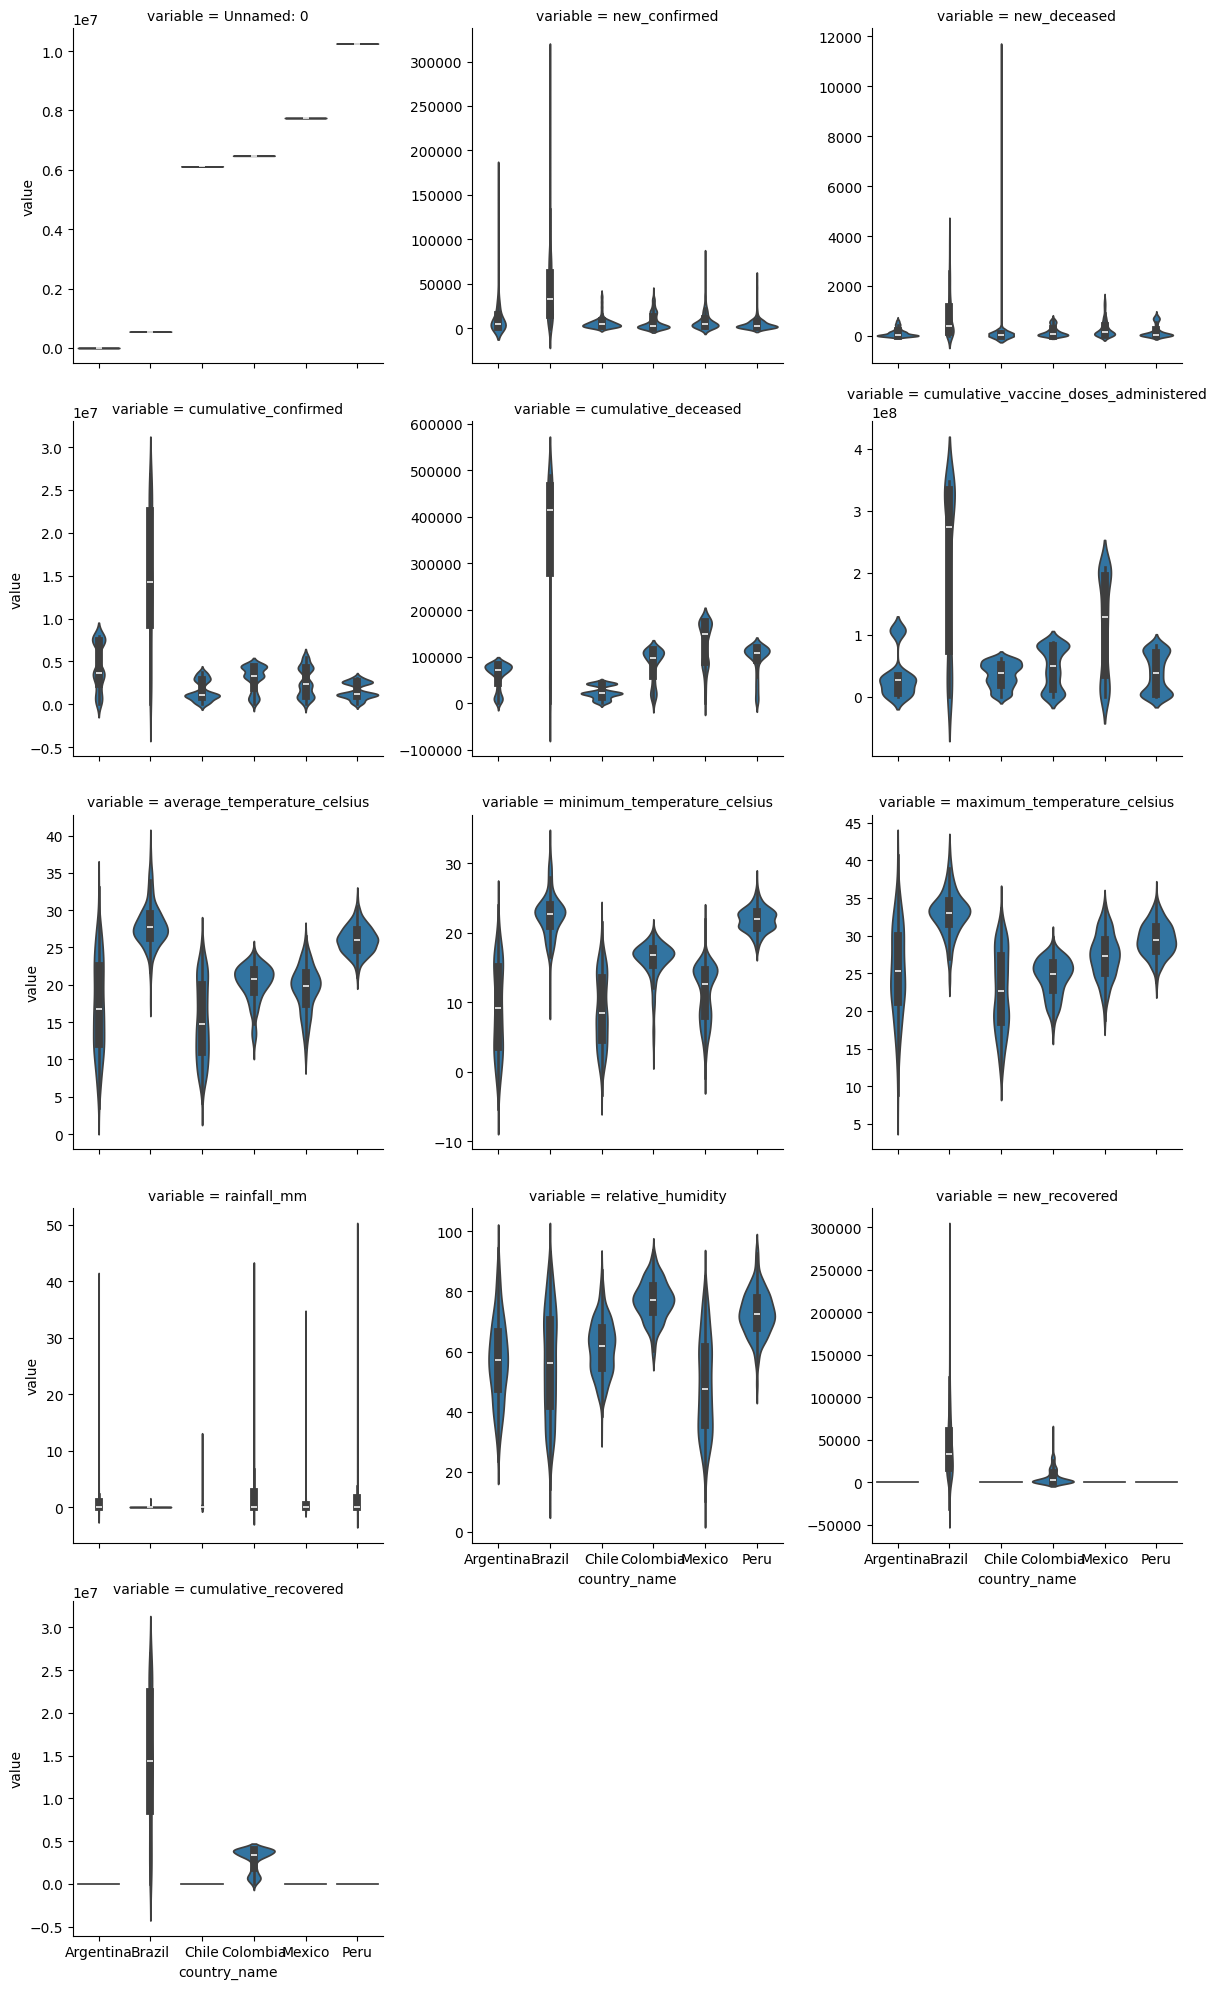

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el DataFrame desde el CSV
df_Latam = pd.read_csv("DatosLatinoamerica3.csv")

# Seleccionar columnas con más de 6 valores únicos (excluyendo identificadores y coordenadas)
columnas_mayores_6 = []
for i in df_Latam.columns:
    if i not in ['location_key', 'date', 'country_code', 'latitude', 'longitude']:
        if df_Latam[i].nunique() > 6:
            columnas_mayores_6.append(i)

# Agregar la columna 'country_name' para hacer análisis por país
columnas_mayores_6.append('country_name')

# Crear un nuevo DataFrame con las columnas seleccionadas
df_Latam_mayores_6 = df_Latam[columnas_mayores_6]

# Obtener la lista de países en el DataFrame para usarlos en el orden
order = df_Latam['country_name'].unique()

# Definir una función para crear los gráficos de violín en una grilla
def crear_graficos_violin(data, variables, hue='country_name'):
    # Configurar la grilla con FacetGrid
    g = sns.FacetGrid(pd.melt(data, id_vars=[hue], value_vars=variables), col="variable", col_wrap=3, sharey=False, height=4)
    g.map(sns.violinplot, hue, "value", order=order)
    g.add_legend()
    plt.show()

# Llamar a la función con las variables seleccionadas
variables_seleccionadas = [col for col in df_Latam_mayores_6.columns if col not in ['country_name']]
crear_graficos_violin(df_Latam_mayores_6, variables_seleccionadas)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un DataFrame de ejemplo (reemplaza esto con tus datos reales)
# Ejemplo: df_Latam = pd.read_csv('tu_archivo.csv')

# Calcular la suma semanal de casos nuevos de COVID-19 por país
weekly_cases = df_Latam_cleaned.groupby(['country_name', 'week'])['new_confirmed'].sum().reset_index()

# Crear el gráfico de violines para la evolución semanal
plt.figure(figsize=(14, 7))
sns.violinplot(x='week', y='new_confirmed', hue='country_name', data=weekly_cases)
plt.xlabel('Semana del año')
plt.ylabel('Casos Nuevos de COVID-19')
plt.title('Evolución Semanal de Casos Nuevos de COVID-19 en América Latina')
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


KeyError: 'week'

In [ ]:
print(df['cumulative_vaccine_doses_administered'].describe())


count    2.679290e+05
mean     1.670412e+06
std      1.394951e+07
min      0.000000e+00
25%      4.032000e+03
50%      1.540200e+04
75%      7.127800e+04
max      3.478685e+08
Name: cumulative_vaccine_doses_administered, dtype: float64


In [ ]:
print(df['cumulative_vaccine_doses_administered'].isna().any())


True


In [ ]:
print(df_Latam.head())

            Unnamed: 0 location_key country_code country_name  new_confirmed  \
date                                                                           
2021-01-01         366           AR           AR    Argentina         2685.0   
2021-01-02         367           AR           AR    Argentina         7767.0   
2021-01-03         368           AR           AR    Argentina         4934.0   
2021-01-04         369           AR           AR    Argentina        13953.0   
2021-01-05         370           AR           AR    Argentina        14085.0   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-01         140.0                2685.0                140.0   
2021-01-02         166.0             1676004.0              46968.0   
2021-01-03         157.0             1691102.0              47177.0   
2021-01-04         157.0             1699389.0              47316.0   
2021-01-05   

intantamos con los decesos

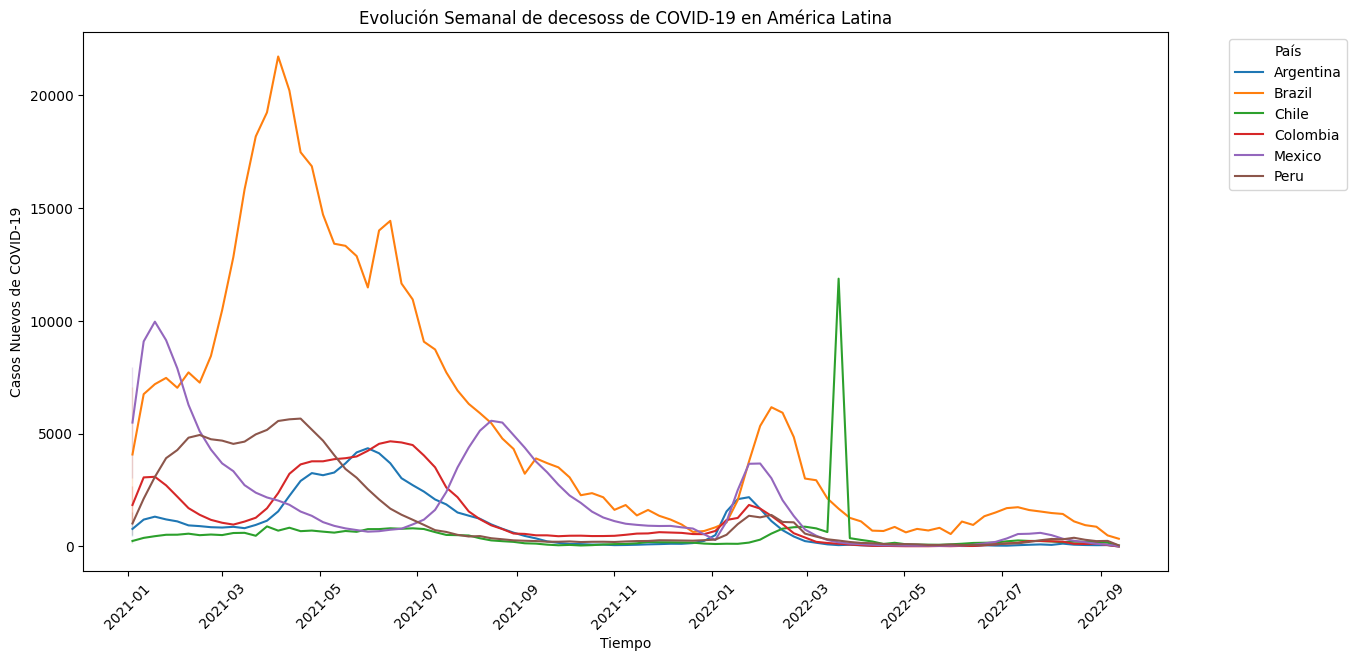

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de que la columna 'date' sea de tipo datetime
df_Latam['date'] = pd.to_datetime(df_Latam['date'])

# Calcular la semana y el año a partir de la columna 'date'
df_Latam['week'] = df_Latam['date'].dt.isocalendar().week
df_Latam['year'] = df_Latam['date'].dt.isocalendar().year

# Calcular la suma semanal de casos nuevos de COVID-19 por país
weekly_cases = df_Latam.groupby(['country_name', 'year', 'week'])['new_deceased'].sum().reset_index()

# Crear una columna de tiempo combinando el año y la semana para la visualización
weekly_cases['time'] = weekly_cases['year'].astype(str) + '-W' + weekly_cases['week'].astype(str)

# Convertir la columna de tiempo a un formato datetime adecuado para el eje X
weekly_cases['time'] = pd.to_datetime(weekly_cases['time'] + '-1', format='%Y-W%W-%w')

# Crear el gráfico de líneas para la evolución semanal
plt.figure(figsize=(14, 7))
sns.lineplot(x='time', y='new_deceased', hue='country_name', data=weekly_cases)
plt.xlabel('Tiempo')
plt.ylabel('Decesos de COVID-19')
plt.title('Evolución Semanal de decesos de COVID-19 en América Latina')
plt.xticks(rotation=45)
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# Procedemos a analizar la distribucion de la poblacion por grupos de edad en los paises seleccionados, para trata de entender como se comporta la poblacion en cada pais y en un futuro poder tomar decisiones mas acertadas

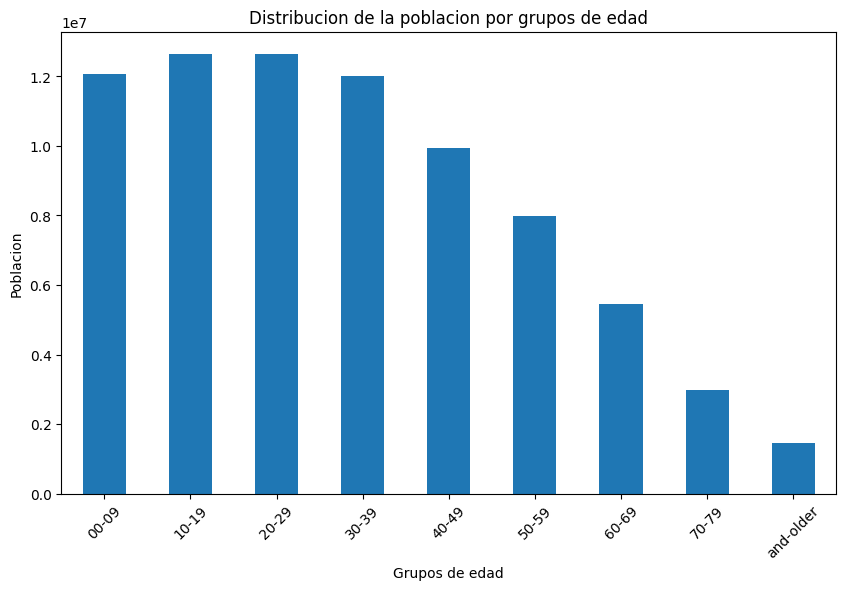

In [85]:
age_columns=['population_age_00_09','population_age_10_19','population_age_20_29','population_age_30_39','population_age_40_49','population_age_50_59','population_age_60_69','population_age_70_79','population_age_80_and_older']
age_distribution = df_Latam_cleaned[age_columns].mean()

plt.figure(figsize=(10, 6))
age_distribution.plot(kind='bar',stacked=True)
plt.xlabel('Grupos de edad')
plt.ylabel('Poblacion')
plt.title('Distribucion de la poblacion por grupos de edad')
plt.xticks(range(len(age_columns)),[col.split('_')[-2] + '-'+ col.split ('_') [-1] for col in age_columns], rotation=45)
plt.show()


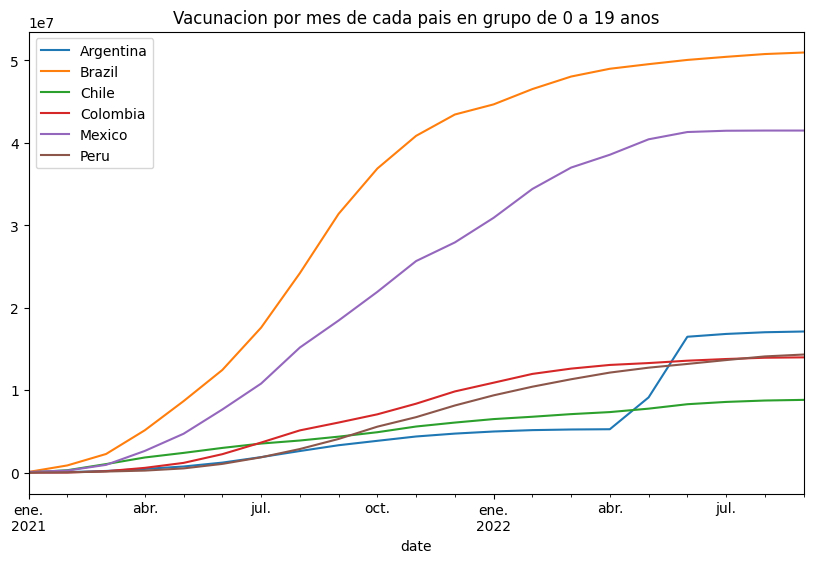

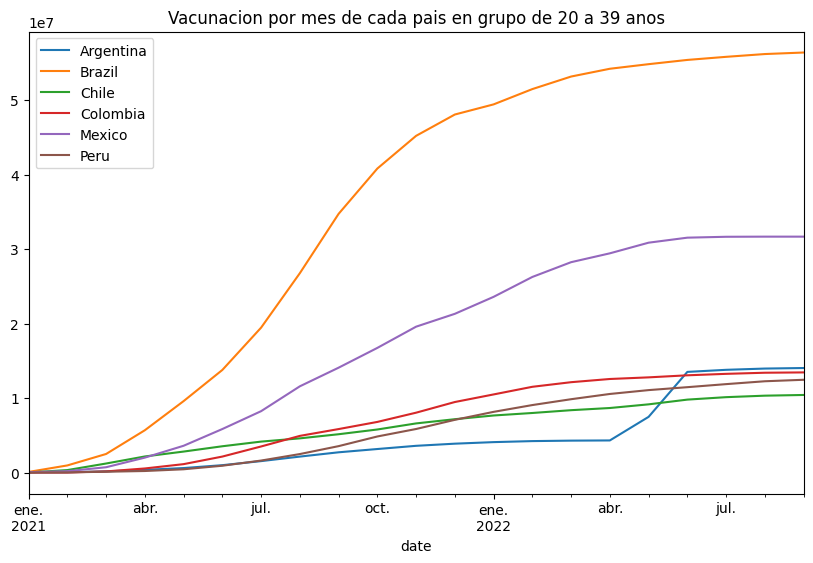

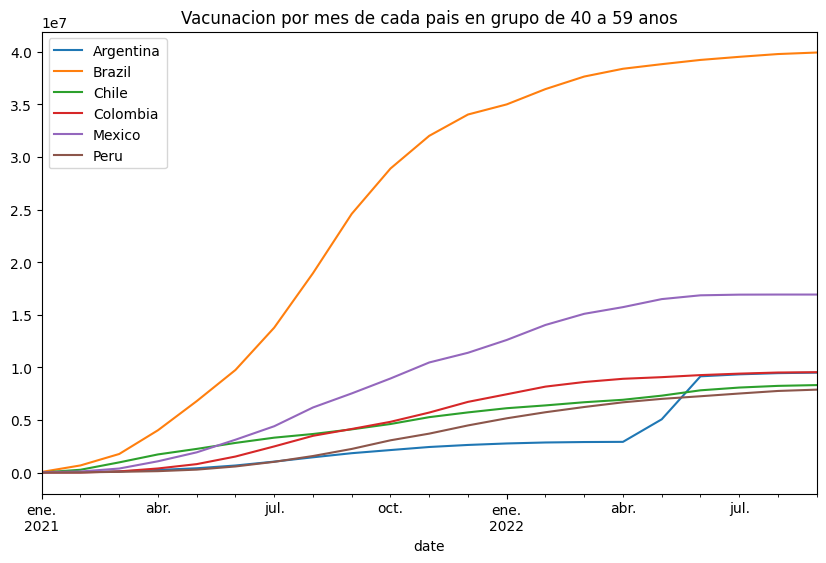

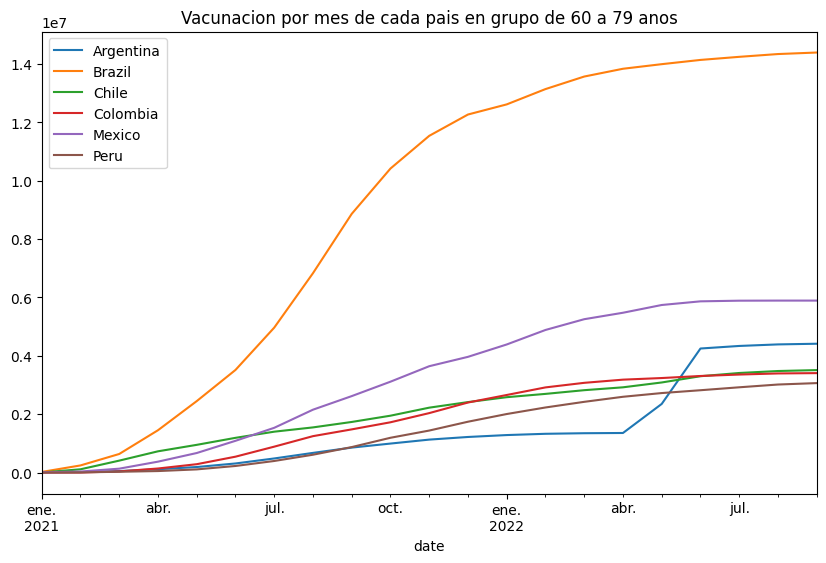

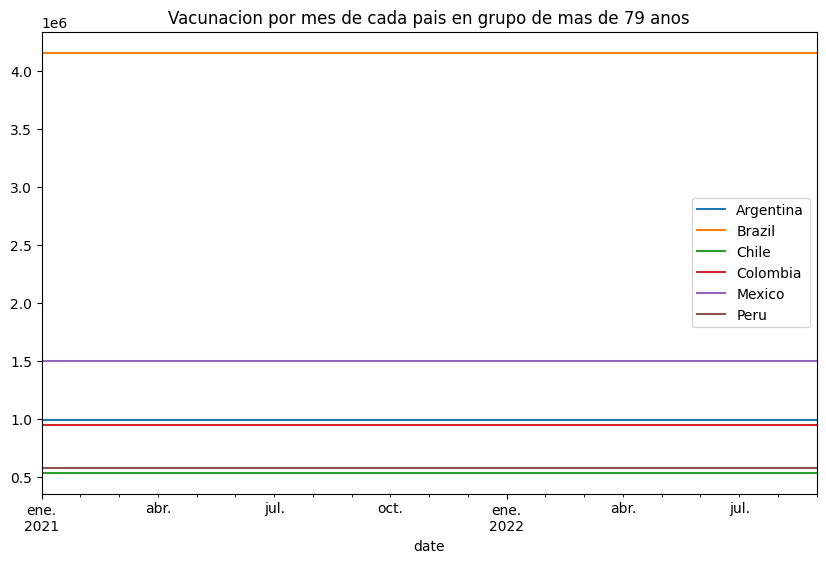

In [88]:
# Agrupo por edades y agrego analisis de vacunados por grupos.
df_Latam_cleaned['population_age_00_19']=df_Latam_cleaned['population_age_00_09']+df_Latam_cleaned['population_age_10_19']
df_Latam_cleaned['population_age_20_39']=df_Latam_cleaned['population_age_20_29']+df_Latam_cleaned['population_age_30_39']
df_Latam_cleaned['population_age_40_59']=df_Latam_cleaned['population_age_40_49']+df_Latam_cleaned['population_age_50_59']
df_Latam_cleaned['population_age_60_79']=df_Latam_cleaned['population_age_60_69']+df_Latam_cleaned['population_age_70_79']
df_Latam_cleaned['population_age_80_and_older']=df_Latam_cleaned['population_age_80_and_older']

df_Latam_cleaned['population_age_00_19_vacunados']=df_Latam_cleaned['cumulative_vaccine_doses_administered']*df_Latam_cleaned['population_age_10_19']/df_Latam_cleaned['population']
df_Latam_cleaned['population_age_20_39_vacunados']=df_Latam_cleaned['cumulative_vaccine_doses_administered']*df_Latam_cleaned['population_age_30_39']/df_Latam_cleaned['population']
df_Latam_cleaned['population_age_40_59_vacunados']=df_Latam_cleaned['cumulative_vaccine_doses_administered']*df_Latam_cleaned['population_age_50_59']/df_Latam_cleaned['population']
df_Latam_cleaned['population_age_60_79_vacunados']=df_Latam_cleaned['cumulative_vaccine_doses_administered']*df_Latam_cleaned['population_age_70_79']/df_Latam_cleaned['population']
df_Latam_cleaned['population_age_80_and_older_vacunados']=df_Latam_cleaned['cumulative_vaccine_doses_administered']*df_Latam_cleaned['population_age_80_and_older']/df_Latam_cleaned['population']                                                         

df_Latam_cleaned['population_age_00_19_vacunados']=df_Latam_cleaned['population_age_00_19_vacunados'].fillna(0)
df_Latam_cleaned['population_age_20_39_vacunados']=df_Latam_cleaned['population_age_20_39_vacunados'].fillna(0)
df_Latam_cleaned['population_age_40_59_vacunados']=df_Latam_cleaned['population_age_40_59_vacunados'].fillna(0)
df_Latam_cleaned['population_age_60_79_vacunados']=df_Latam_cleaned['population_age_60_79_vacunados'].fillna(0)
df_Latam_cleaned['population_age_80_and_older_vacunados']=df_Latam_cleaned['population_age_80_and_older_vacunados'].fillna(0)          

df_Latam_cleaned['population_age_00_19_vacunados']=df_Latam_cleaned['population_age_00_19_vacunados'].astype(int)
df_Latam_cleaned['population_age_20_39_vacunados']=df_Latam_cleaned['population_age_20_39_vacunados'].astype(int)
df_Latam_cleaned['population_age_40_59_vacunados']=df_Latam_cleaned['population_age_40_59_vacunados'].astype(int)
df_Latam_cleaned['population_age_60_79_vacunados']=df_Latam_cleaned['population_age_60_79_vacunados'].astype(int)
df_Latam_cleaned['population_age_80_and_older_vacunados']=df_Latam_cleaned['population_age_80_and_older_vacunados'].astype(int)

df_Latam_cleaned['population_age_00_19_vacunados'].sum()
df_Latam_cleaned['population_age_20_39_vacunados'].sum()
df_Latam_cleaned['population_age_40_59_vacunados'].sum()
df_Latam_cleaned['population_age_60_79_vacunados'].sum()
df_Latam_cleaned['population_age_80_and_older_vacunados'].sum()

# Grafica valores medios de todos los paises cumulative_vaccine_doses_administered
fig, ax= plt.subplots(figsize=(10, 6))
for pais in paises:
    df_Latam_cleaned[df_Latam_cleaned['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_00_19_vacunados'].plot()
plt.title('Vacunacion por mes de cada pais en grupo de 0 a 19 anos')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises)
plt.show()

fig, ax= plt.subplots(figsize=(10, 6))
for pais in paises:
    df_Latam_cleaned[df_Latam_cleaned['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_20_39_vacunados'].plot()
plt.title('Vacunacion por mes de cada pais en grupo de 20 a 39 anos')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises)
plt.show()

fig, ax= plt.subplots(figsize=(10, 6))
for pais in paises:
    df_Latam_cleaned[df_Latam_cleaned['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_40_59_vacunados'].plot()
plt.title('Vacunacion por mes de cada pais en grupo de 40 a 59 anos')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises)
plt.show()

fig, ax= plt.subplots(figsize=(10, 6))
for pais in paises:
    df_Latam_cleaned[df_Latam_cleaned['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_60_79_vacunados'].plot()
plt.title('Vacunacion por mes de cada pais en grupo de 60 a 79 anos')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises)
plt.show()

fig, ax= plt.subplots(figsize=(10, 6))
for pais in paises:
    df_Latam_cleaned[df_Latam_cleaned['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_80_and_older'].plot()
plt.title('Vacunacion por mes de cada pais en grupo de mas de 79 anos')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises)
plt.show()


          

#Revisamos la mortalidad por genero para identificar la poblacion mas vulnerable en cada pais, con esto ya podriamos tener una idea de cual serian las poblacion a vacunar primero

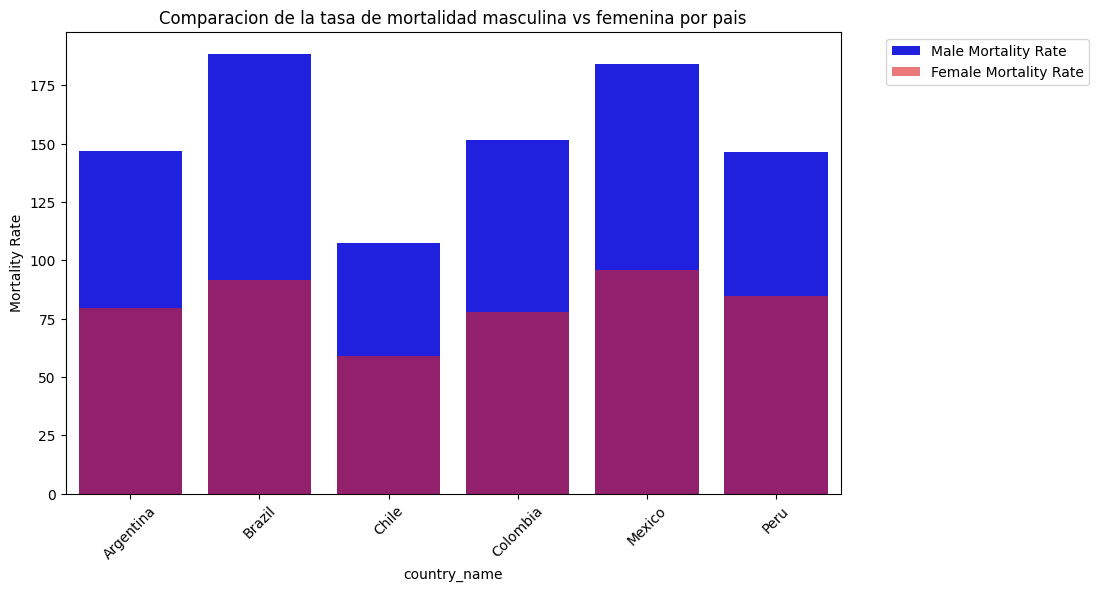

In [89]:
#grafica de mortalidad por genero

plt.figure(figsize=(10, 6))
sns.barplot(data=df_Latam_cleaned,x='country_name',y='adult_male_mortality_rate',color='blue',label='Male Mortality Rate')
sns.barplot(data=df_Latam_cleaned,x='country_name',y='adult_female_mortality_rate', color='red', alpha=0.6, label='Female Mortality Rate')
plt.xticks(rotation=45)
plt.ylabel('Mortality Rate')
plt.title('Comparacion de la tasa de mortalidad masculina vs femenina por pais')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Matriz de correlacion de indicadores demograficos y de salud

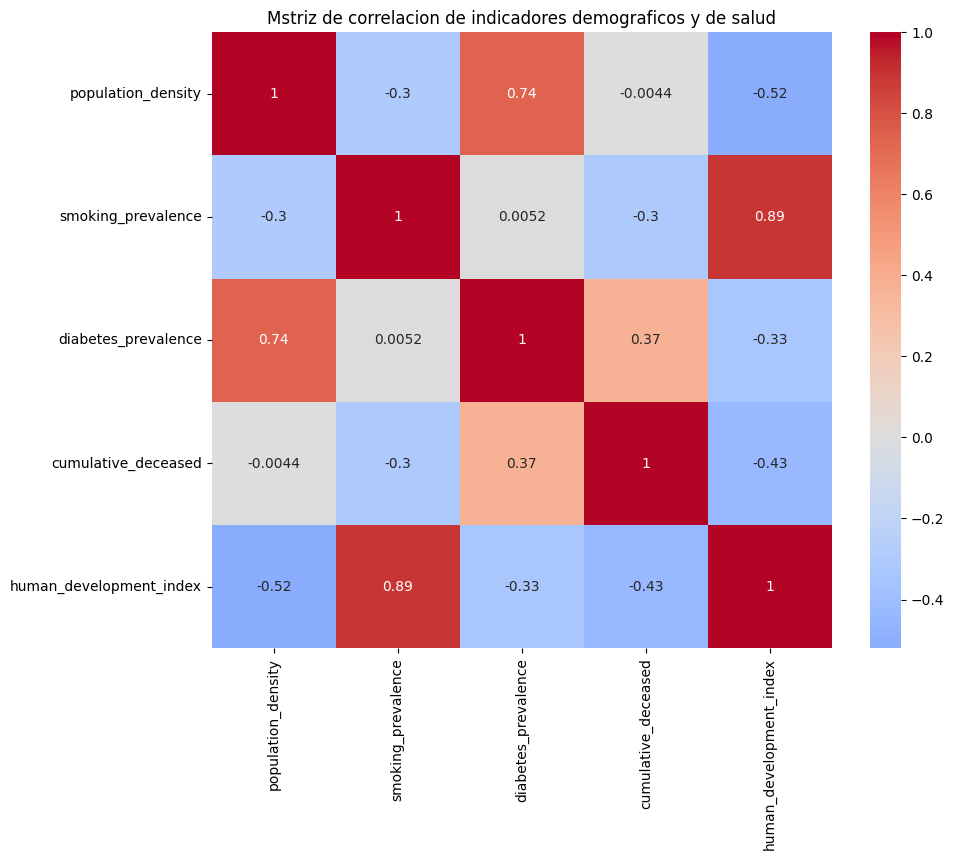

In [91]:
#Seleccion de categorias de columnas para analisis de correlacion

columns = ['population_density','smoking_prevalence','diabetes_prevalence','cumulative_deceased','human_development_index']
correlation_matrix=df_Latam_cleaned[columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Mstriz de correlacion de indicadores demograficos y de salud')
plt.show()


Diabetes y densidad
Smoking y desarrollo humano
A mayor desarrollo menor indice de mortalidad
A mayor indice de desarrollo menor prevalencia de diabetes


# Comparacion de prevalencia de Diabetes y la Tasa de Mortalidad por COVID-19

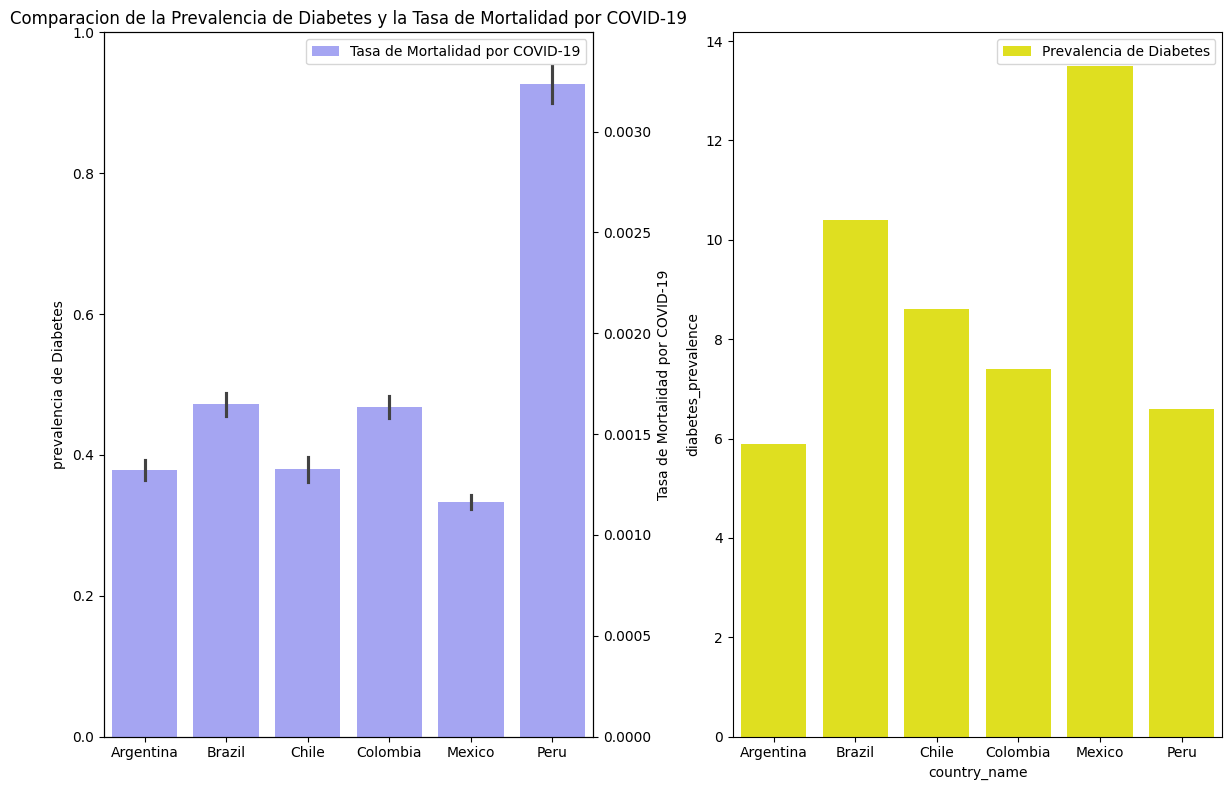

In [96]:
from matplotlib.pyplot import twinx


fig, (ax,ax2) = plt.subplots(1, 2, figsize=(12, 8))
sns.barplot(data=df_Latam_cleaned, x=df_Latam_cleaned ['country_name'], y=df_Latam_cleaned['diabetes_prevalence'], color='yellow', label='Prevalencia de Diabetes')
ax2=ax.twinx()
sns.barplot(data=df_Latam_cleaned, x=df_Latam_cleaned['country_name'], y=df_Latam_cleaned['cumulative_deceased']/df_Latam_cleaned['population'], color='Blue', label='Tasa de Mortalidad por COVID-19',ax=ax2, alpha=0.4)
plt.xticks(rotation=90)
ax.set_ylabel('prevalencia de Diabetes')
ax2.set_ylabel('Tasa de Mortalidad por COVID-19')
plt.title('Comparacion de la Prevalencia de Diabetes y la Tasa de Mortalidad por COVID-19')
plt.tight_layout()
plt.show()


# Llamativa desproporcion en mortandad en Peru

# Comparacion de prevalencia de Diabetes y la Tasa de Mortalidad por COVID-19

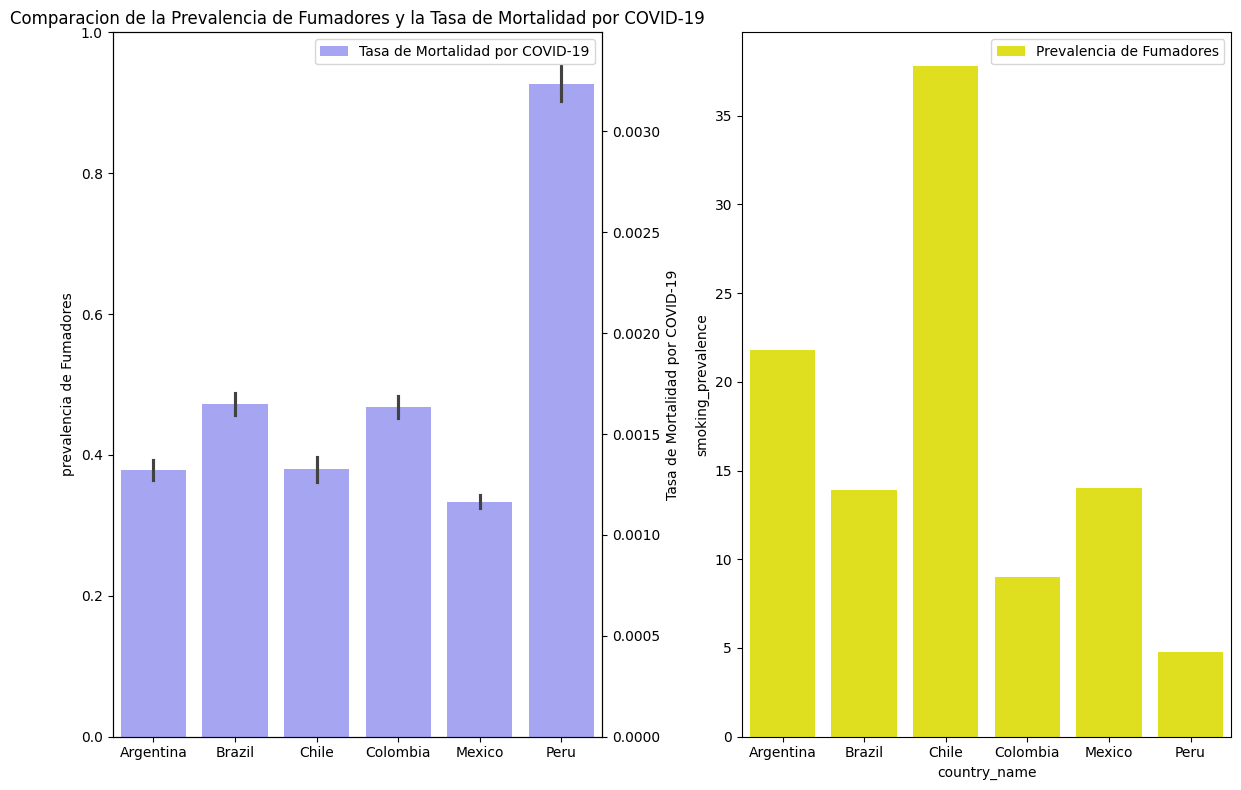

In [97]:
from matplotlib.pyplot import twinx


fig, (ax,ax2) = plt.subplots(1, 2, figsize=(12, 8))
sns.barplot(data=df_Latam_cleaned, x=df_Latam_cleaned ['country_name'], y=df_Latam_cleaned['smoking_prevalence'], color='yellow', label='Prevalencia de Fumadores')
ax2=ax.twinx()
sns.barplot(data=df_Latam_cleaned, x=df_Latam_cleaned['country_name'], y=df_Latam_cleaned['cumulative_deceased']/df_Latam_cleaned['population'], color='Blue', label='Tasa de Mortalidad por COVID-19',ax=ax2, alpha=0.4)
plt.xticks(rotation=90)
ax.set_ylabel('prevalencia de Fumadores')
ax2.set_ylabel('Tasa de Mortalidad por COVID-19')
plt.title('Comparacion de la Prevalencia de Fumadores y la Tasa de Mortalidad por COVID-19')
plt.tight_layout()
plt.show()

# Llamativa desproporcion en el caso de Chile

# AVANCE 3 EDA Analisis Exploratorio de Datos

# Evolucion semana de nuevos casos de COVID-19 en America Latina

In [ ]:
# Reemplaza esta línea con la ubicación de tu archivo
file_path = "C:\\Users\\sdcav\\OneDrive\\Desktop\\Clase_Numpy\\DatosLatinoamerica3.csv"
df_Latam = pd.read_csv(file_path)

# Verificar duplicados en el DataFrame
df_Latam_cleaned = df_Latam.drop_duplicates()

# Convertir la columna de fecha a formato datetime
df_Latam_cleaned['date'] = pd.to_datetime(df_Latam_cleaned['date'])

# Establecer la columna de fecha como índice
df_Latam_cleaned.set_index('date', inplace=True)

# Verificar el tipo de índice
print(type(df_Latam_cleaned.index))  # Debería imprimir: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>

# Mostrar las primeras filas y la descripción de los datos
print(df_Latam_cleaned.head())
print(df_Latam_cleaned.describe())


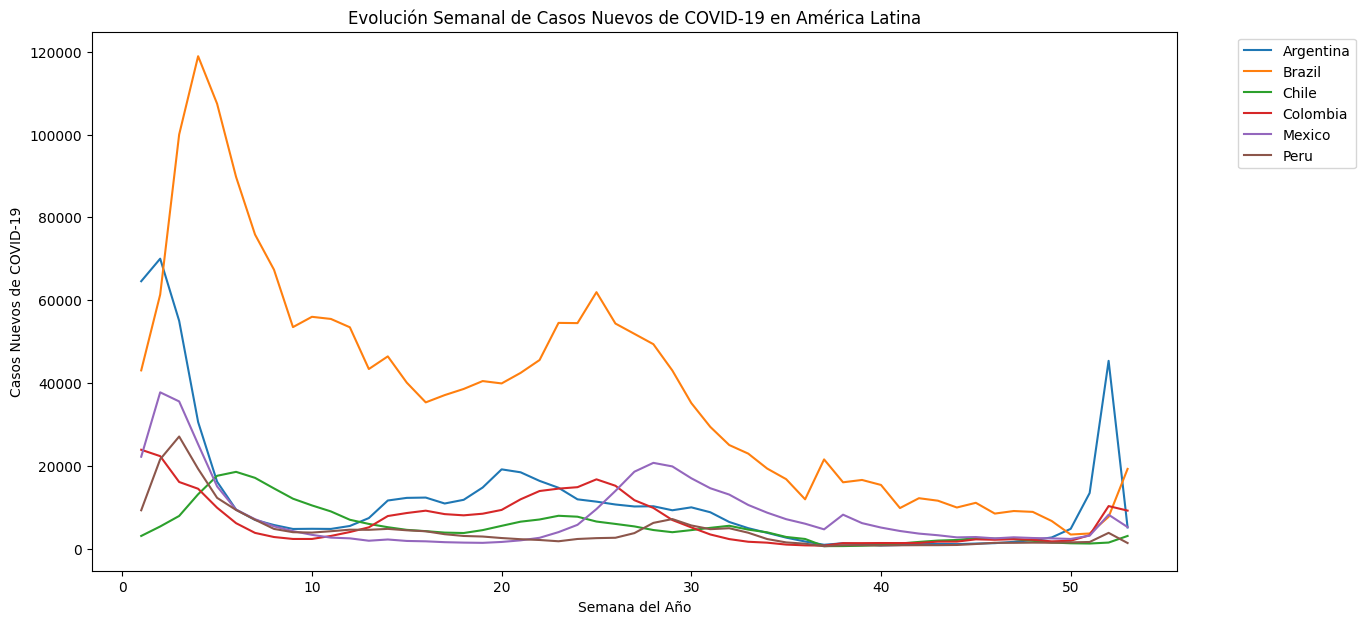

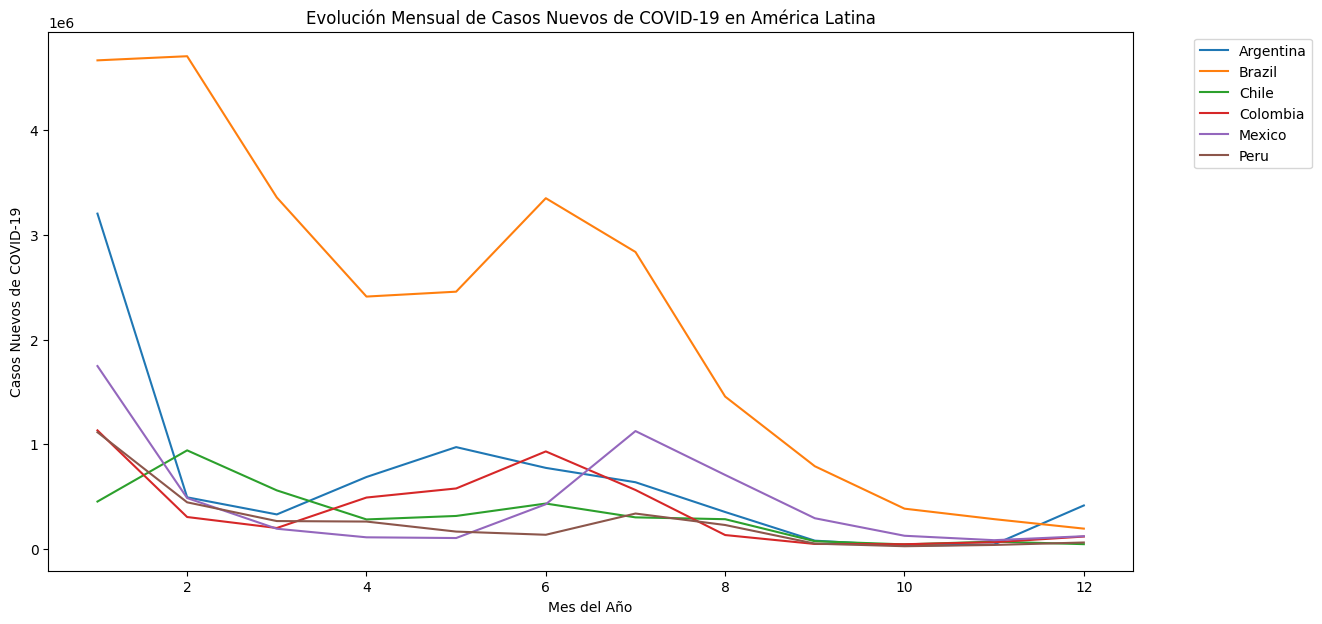

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el DataFrame desde el CSV
df_Latam = pd.read_csv("DatosLatinoamerica3.csv")

# Convertir la columna 'date' en tipo datetime
df_Latam['date'] = pd.to_datetime(df_Latam['date'])

# Extraer la semana y el año
df_Latam['week'] = df_Latam['date'].dt.isocalendar().week
df_Latam['year'] = df_Latam['date'].dt.isocalendar().year

# Agrupar por país y semana y sumar los casos nuevos
weekly_cases = df_Latam.groupby(['country_name', 'week'])['new_confirmed'].mean().reset_index()

# Crear la gráfica para las semanas
plt.figure(figsize=(14, 7))

for country in weekly_cases['country_name'].unique():
    country_weekly_cases = weekly_cases[weekly_cases['country_name'] == country]
    plt.plot(country_weekly_cases['week'], country_weekly_cases['new_confirmed'], label=country)

plt.xlabel('Semana del Año')
plt.ylabel('Casos Nuevos de COVID-19')
plt.title('Evolución Semanal de Casos Nuevos de COVID-19 en América Latina')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Ahora para el año
# Extraer el mes y el año
df_Latam['month'] = df_Latam['date'].dt.month

# Agrupar por país y mes y sumar los casos nuevos
monthly_cases = df_Latam.groupby(['country_name', 'month'])['new_confirmed'].sum().reset_index()

# Crear la gráfica para los meses
plt.figure(figsize=(14, 7))

for country in monthly_cases['country_name'].unique():
    country_monthly_cases = monthly_cases[monthly_cases['country_name'] == country]
    plt.plot(country_monthly_cases['month'], country_monthly_cases['new_confirmed'], label=country)

plt.xlabel('Mes del Año')
plt.ylabel('Casos Nuevos de COVID-19')
plt.title('Evolución Mensual de Casos Nuevos de COVID-19 en América Latina')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Se visualiza la primer y ultima semana del ano con un fuerte pico y otra nueva subida importante a mitad del ano coincidiendo con festividades y ciclos de vacaciones anuales.Se puede visualizar en terminos generales que la pandemia ha ido disminuyendo fuertemente a la largo del tiempo.

In [ ]:
df_Latam[(df_Latam.index =='2021')&(df_Latam.index.month == 1)&(df_Latam.index.day ==))]

# Progreso de la vacunacion

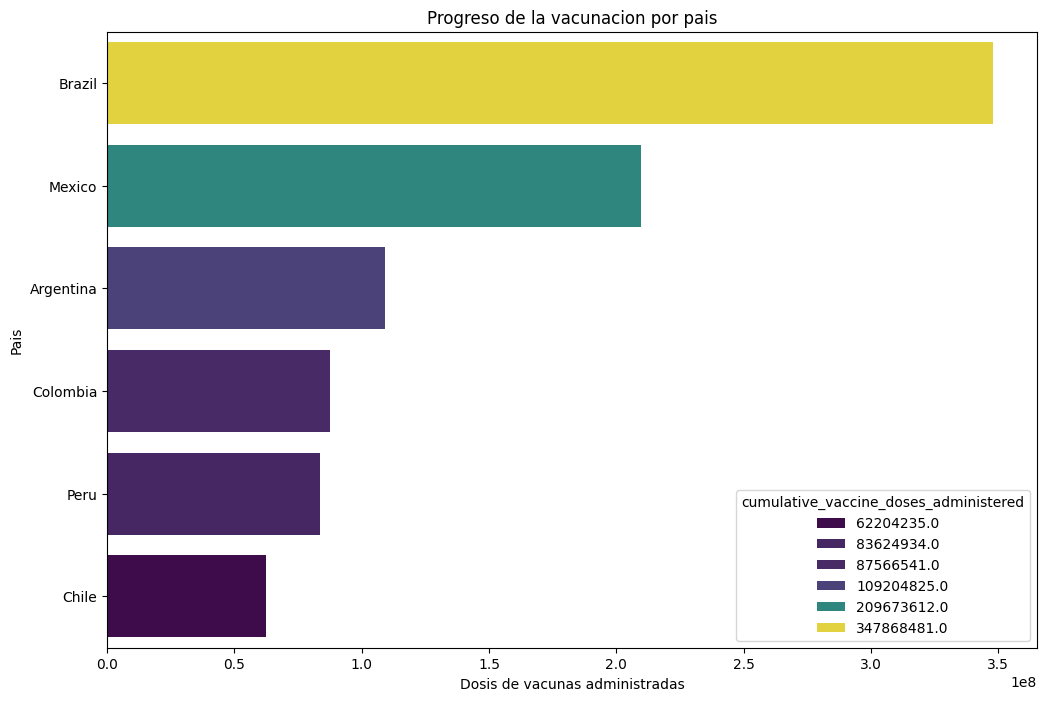

In [126]:
vaccination_data = df_Latam.groupby('country_name')['cumulative_vaccine_doses_administered'].max().sort_values(ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(x=vaccination_data.values, y = vaccination_data.index, hue=vaccination_data, palette='viridis')
plt.xlabel('Dosis de vacunas administradas')
plt.ylabel('Pais')
plt.title('Progreso de la vacunacion por pais')
plt.show()

# Interesante ver los volumenes y la comparacion entre paises ya que Brasil solo parece mas que duplicar Argentina y podria contener Argentina, Colombia, Peru, Chile. 
Desde un punto de vista comercial interesante analizar complejidades aduaneras, impositivas, legales, que ventajas y desventajas podria traer esta simplificacion geopolitica.


# Relacion entre temperatura promedio y nuevos casos confirmados de COVID-19

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


C:\Users\sdcav\AppData\Local\Temp\ipykernel_20800\2016095611.py:26: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_resampled = df_Latam_cleaned.resample('M').mean(numeric_only=True)


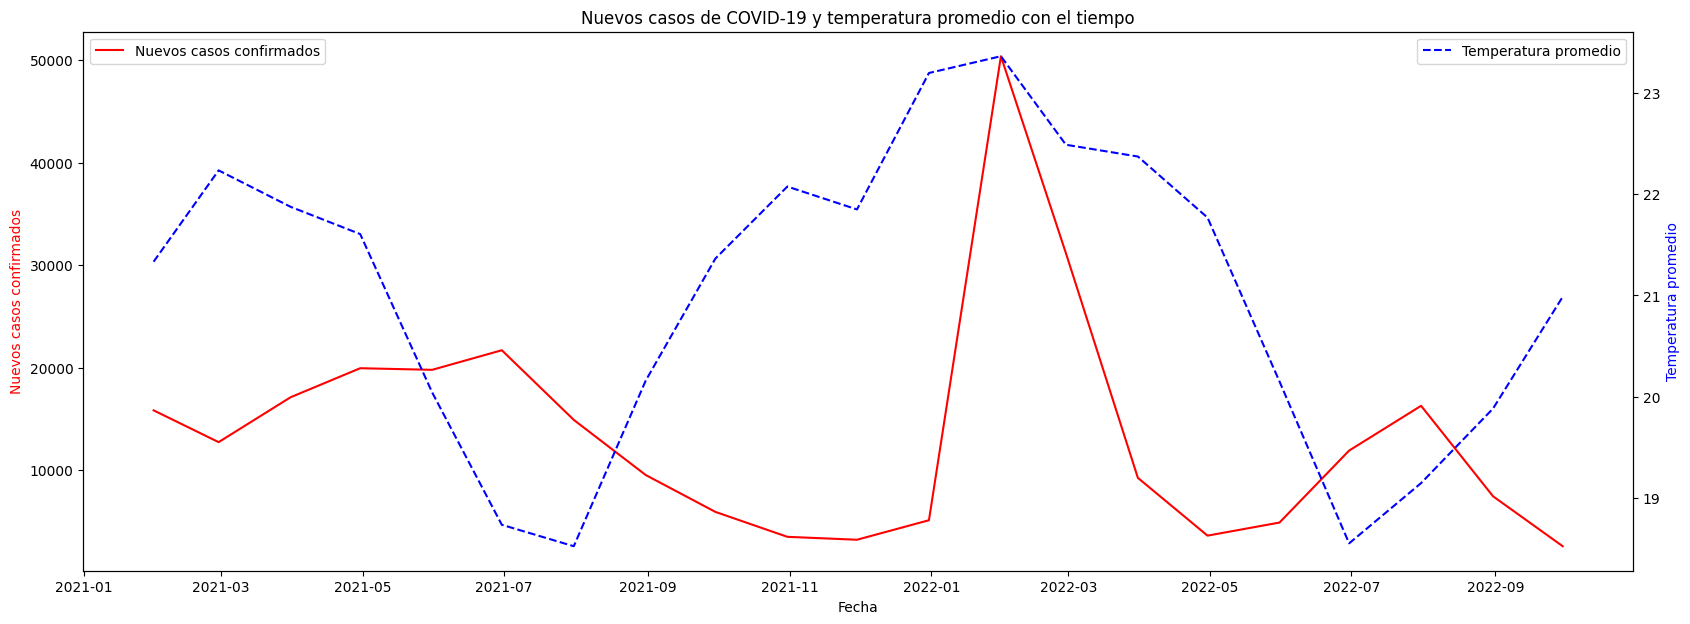

In [133]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegúrate de que estás utilizando el DataFrame limpio y con el índice de fecha
file_path = "C:\\Users\\sdcav\\OneDrive\\Desktop\\Clase_Numpy\\DatosLatinoamerica3.csv"
df_Latam = pd.read_csv(file_path)
df_Latam_cleaned = df_Latam.drop_duplicates()

# Convertir la columna de fecha a formato datetime
df_Latam_cleaned['date'] = pd.to_datetime(df_Latam_cleaned['date'])

# Establecer la columna de fecha como índice
df_Latam_cleaned.set_index('date', inplace=True)

# Asegúrate de que el índice es de tipo DatetimeIndex
print(type(df_Latam_cleaned.index))  # Debería imprimir: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>

# Lista de países
paises = df_Latam_cleaned['country_name'].unique()

plt.figure(figsize=(20, 7))
ax1 = plt.gca()
ax2 = ax1.twinx()

# Resamplear por mes y calcular la media
df_resampled = df_Latam_cleaned.resample('M').mean(numeric_only=True)

# Graficar nuevos casos confirmados
ax1.plot(df_resampled.index, df_resampled['new_confirmed'], color='red', label='Nuevos casos confirmados')
# Graficar temperatura promedio
ax2.plot(df_resampled.index, df_resampled['average_temperature_celsius'], color='blue', label='Temperatura promedio', linestyle='--')

ax1.set_xlabel('Fecha')
ax1.set_ylabel('Nuevos casos confirmados', color='red')
ax2.set_ylabel('Temperatura promedio', color='blue')
plt.title('Nuevos casos de COVID-19 y temperatura promedio con el tiempo')

# Añadir leyendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


# Podemos observar que la temperatura promedio ha ido aumentando y los casos confirmados han ido disminuyendo sin embargo hubo un pico antes del mes de marzo pero disminuyo rapidamente, esto puede ser por la cantidad de vacunas administradas o por la cantidad de personas que se han vacunado.

# Impacto debido a la urbanizacion y la densidad de poblacion 

In [140]:
df_Latam.columns

Index(['Unnamed: 0', 'location_key', 'date', 'country_code', 'country_name',
       'new_confirmed', 'new_deceased', 'cumulative_confirmed',
       'cumulative_deceased', 'cumulative_vaccine_doses_administered',
       'population', 'population_male', 'population_female',
       'population_rural', 'population_urban', 'population_density',
       'human_development_index', 'population_age_00_09',
       'population_age_10_19', 'population_age_20_29', 'population_age_30_39',
       'population_age_40_49', 'population_age_50_59', 'population_age_60_69',
       'population_age_70_79', 'population_age_80_and_older', 'gdp_usd',
       'gdp_per_capita_usd', 'latitude', 'longitude', 'area_sq_km',
       'smoking_prevalence', 'diabetes_prevalence', 'infant_mortality_rate',
       'nurses_per_1000', 'physicians_per_1000', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'relative_humidity', 'population_largest_city',
     

C:\Users\sdcav\AppData\Local\Temp\ipykernel_20800\1896077491.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=urban_cases['urban_population_percentage'], y=urban_cases.index, palette='viridis')


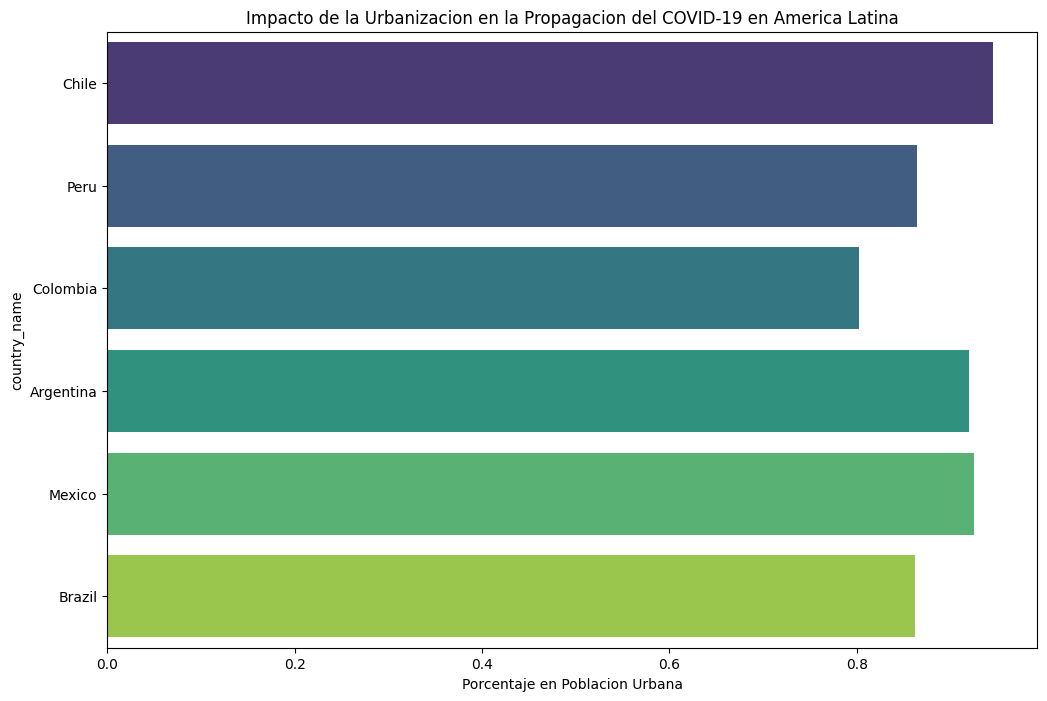

In [141]:
df_Latam['urban_population_percentage'] = df_Latam['population_urban']/df_Latam['population']
urban_cases=df_Latam.groupby('country_name').last().sort_values(by='population_urban')

plt.figure(figsize=(12, 8))
sns.barplot(x=urban_cases['urban_population_percentage'], y=urban_cases.index, palette='viridis')
plt.xlabel('Porcentaje en Poblacion Urbana')
plt.title('Impacto de la Urbanizacion en la Propagacion del COVID-19 en America Latina')
plt.show()

# Todos los paises muestran un alto nivel de poblacion urbana (>80%)

Distribucion de la Poblacion por Edad en Paises con Altas Tasas de Mortalidad por COVID-19

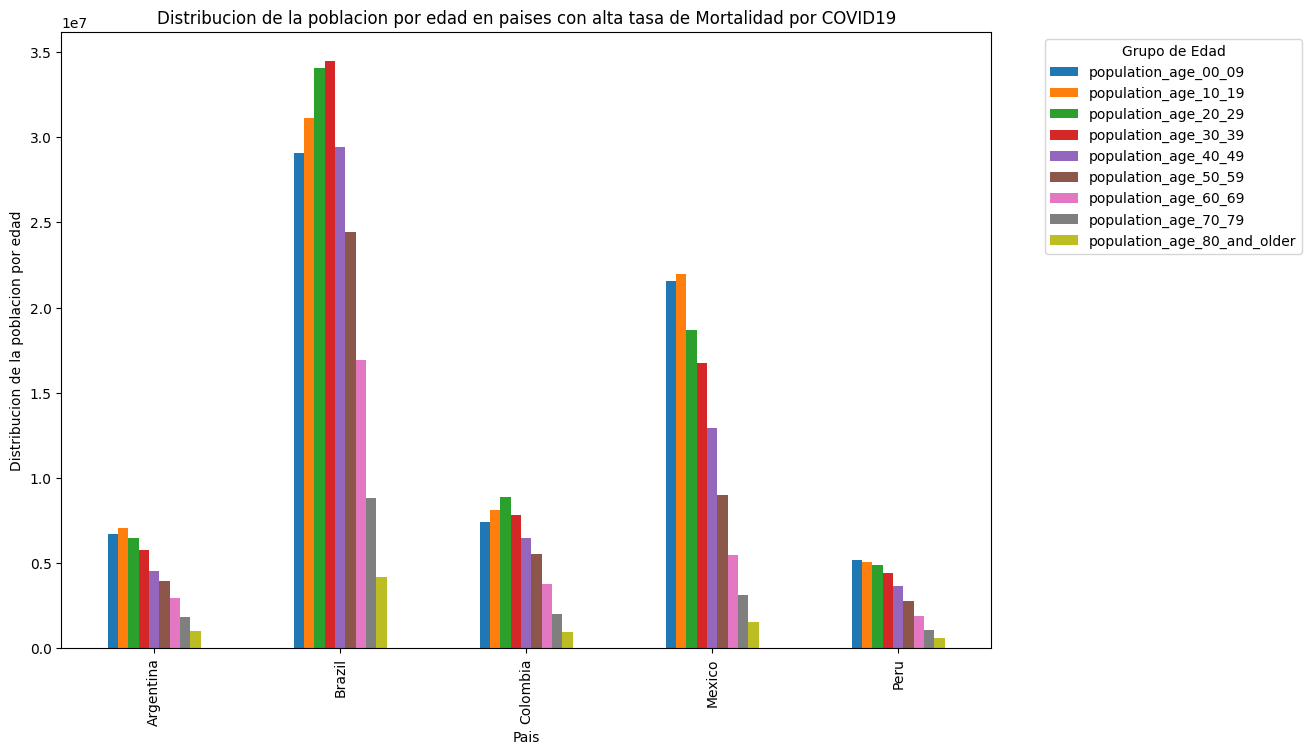

In [145]:
hight_mortality_countries=df_Latam.groupby('country_name')['cumulative_deceased'].max().sort_values(ascending=False).head(5).index
age_groups=['population_age_00_09','population_age_10_19','population_age_20_29','population_age_30_39','population_age_40_49','population_age_50_59','population_age_60_69','population_age_70_79','population_age_80_and_older']
age_distribution = df_Latam[df_Latam['country_name'].isin(hight_mortality_countries)].groupby('country_name')[age_groups].mean()

age_distribution.plot(kind='bar', stacked=False, figsize=(12, 8))
plt.xlabel('Pais')
plt.ylabel('Distribucion de la poblacion por edad')
plt.title('Distribucion de la poblacion por edad en paises con alta tasa de Mortalidad por COVID19')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Grupo de Edad')
plt.show()


In [ ]:
# Destacan Brail y Mexico ambos con altas tasas de mortalidad en rangos etarios menores a 40 anos

# Comparacion de Estrategias de Vacunacion en America Latina

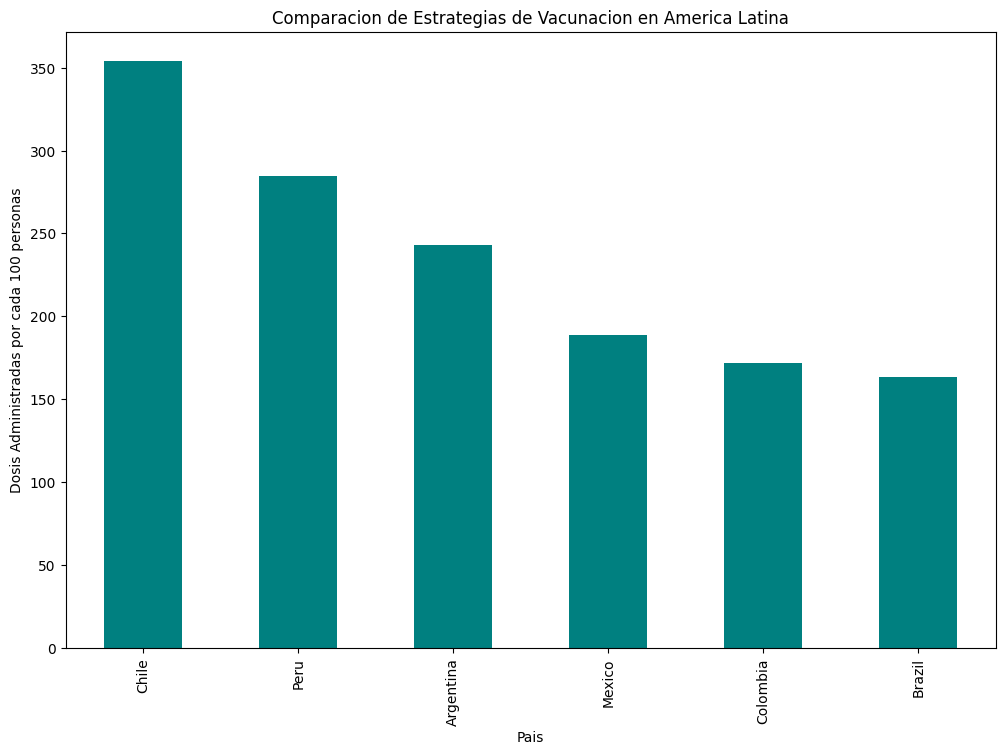

In [147]:
vaccination_strategy = (df_Latam.groupby('country_name')['cumulative_vaccine_doses_administered'].max()/df_Latam.groupby('country_name')['population'].max())*100
vaccination_strategy.sort_values(ascending=False).plot(kind='bar', figsize=(12, 8), color='teal')
plt.xlabel('Pais')
plt.ylabel('Dosis Administradas por cada 100 personas')
plt.title('Comparacion de Estrategias de Vacunacion en America Latina')
plt.show()


Tenemos cantidades mayores a 100 porque tenemos hasta 3,5 veces vacunaciones por personas. Destaca Chile en relacion a Brasil. Se contrapone con el volumen total de vacunas dispensadas en Brasil.

In [149]:
df_Latam.groupby('country_name')['cumulative_deceased'].max().nlargest(5).index

Index(['Brazil', 'Mexico', 'Peru', 'Colombia', 'Argentina'], dtype='object', name='country_name')

In [150]:
df_Latam.groupby('country_name')['cumulative_deceased'].max().nsmallest(5).index

Index(['Chile', 'Argentina', 'Colombia', 'Peru', 'Mexico'], dtype='object', name='country_name')

# Prevalencia de Condiciones Preexistentes en Paises con Altas y Bajas Tasas de Mortalidad por COVID-19

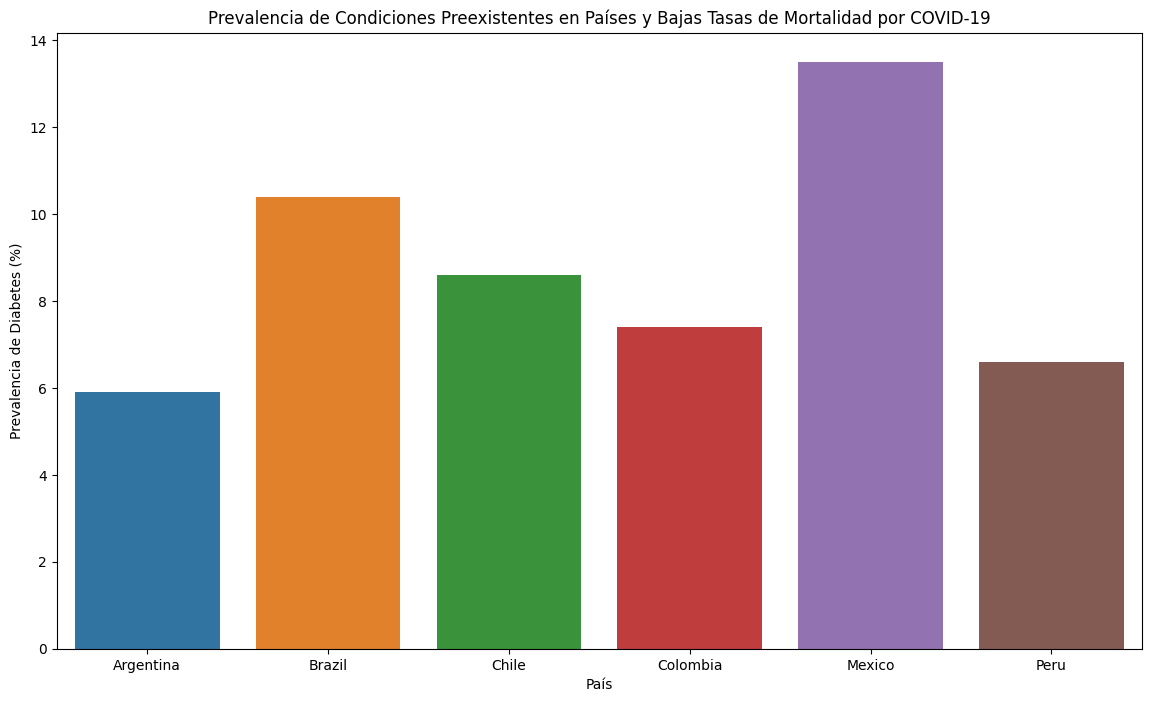

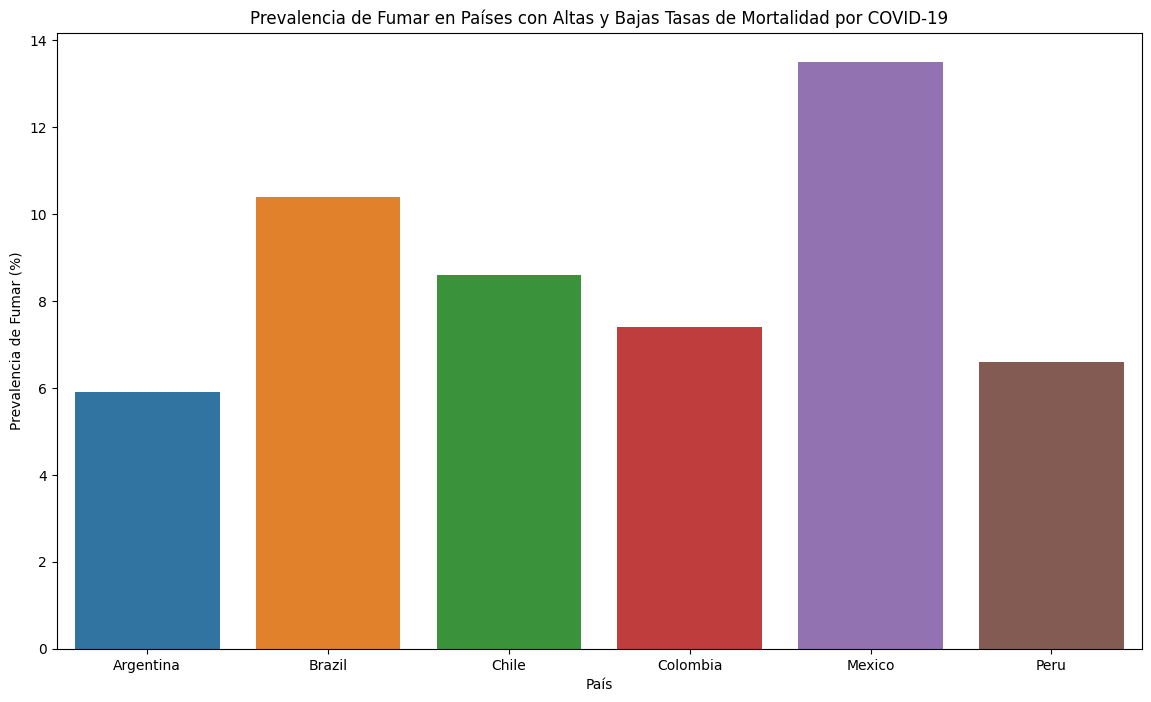

In [155]:
# Prevalencia de diabetes
top_countries = df_Latam.groupby('country_name')['cumulative_deceased'].max().nlargest(5).index
bottom_countries = df_Latam.groupby('country_name')['cumulative_deceased'].max().nsmallest(5).index
conditions_data = df_Latam[df_Latam['country_name'].isin(top_countries.union(bottom_countries))]

plt.figure(figsize=(14, 8))
sns.barplot(data=conditions_data, x='country_name', y='diabetes_prevalence', hue='country_name')
plt.xlabel('País')
plt.ylabel('Prevalencia de Diabetes (%)')
plt.title('Prevalencia de Condiciones Preexistentes en Países y Bajas Tasas de Mortalidad por COVID-19')
plt.show()

# Prevalencia de fumar
plt.figure(figsize=(14, 8))
sns.barplot(data=conditions_data, x='country_name', y='diabetes_prevalence', hue='country_name')
plt.xlabel('País')
plt.ylabel('Prevalencia de Fumar (%)')
plt.title('Prevalencia de Fumar en Países con Altas y Bajas Tasas de Mortalidad por COVID-19')
plt.show()



# Destaca Mexico como prevalencia de diabetes y de fumar mas elevada, siguiendo en importancia Brazil. En cuanto a fumar se observa en tercer lugar a Chile siendo el pais con menor poblacion.

# Comparacion de la Tasa de Letalidad del COVID-19 Entre Paises de America Latina

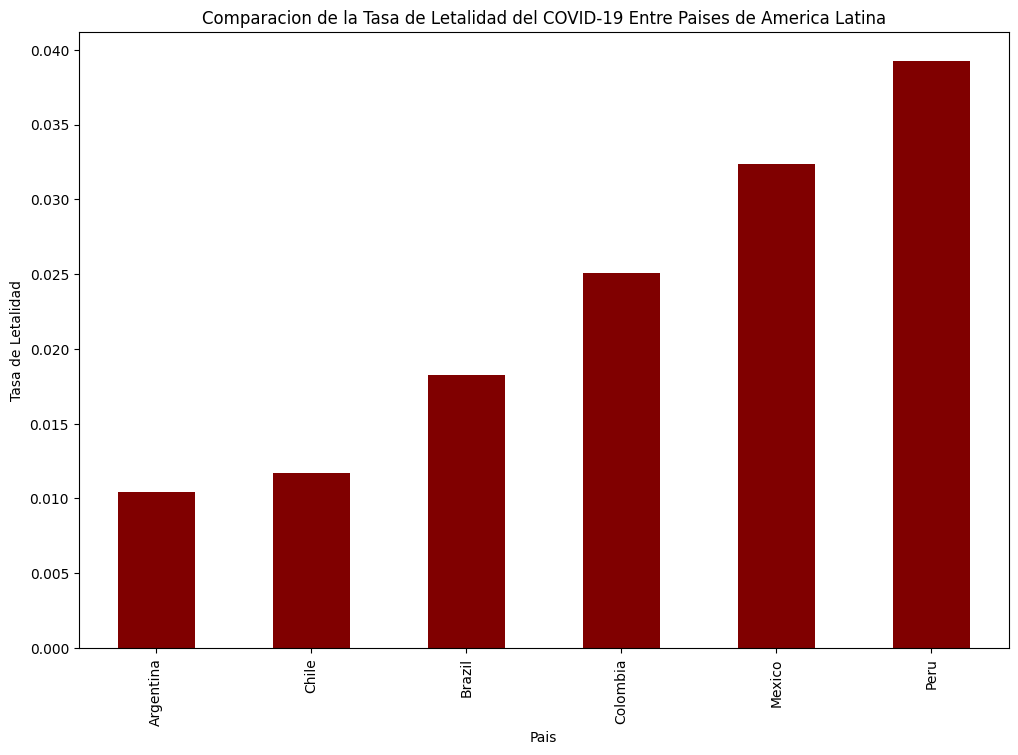

In [158]:
# Calcula la tasa de letalidad por pais
df_Latam['case_fatality_rate'] = df_Latam['cumulative_deceased']/df_Latam['cumulative_confirmed']
fatality_rate = df_Latam.groupby('country_name')['case_fatality_rate'].last().sort_values()

# Crea el grafico de barras
plt.figure(figsize=(12, 8))
bars = fatality_rate.plot(kind='bar', color='maroon')

# Configura los ejes y el titulo del grafico
plt.xlabel('Pais')
plt.ylabel('Tasa de Letalidad')
plt.title('Comparacion de la Tasa de Letalidad del COVID-19 Entre Paises de America Latina')
plt.show()

Destaca Brasil como uno de los 3 de menor tasa de fatalidad con una poblacion relativa muy superior al resto y una dimension geografica tambien muy superior. Interesante ver la baja letalidad de Argentina a pesar de que tuvo un alto nivel de confirmados. La relacion de medicos por habitantes podria ser un factor de analisis a profundizar.

# Relacion entre la Cobertura de Vacunacion y la Reduccion de Casos en America Latina

In [ ]:
import pandas as pd

# Reemplaza esta línea con la ubicación de tu archivo
file_path = "C:\\Users\\sdcav\\OneDrive\\Desktop\\Clase_Numpy\\DatosLatinoamerica3.csv"
df_Latam = pd.read_csv(file_path)

# Verificar duplicados en el DataFrame
df_Latam_cleaned = df_Latam.drop_duplicates()

# Convertir la columna de fecha a formato datetime
df_Latam_cleaned['date'] = pd.to_datetime(df_Latam_cleaned['date'])

# Establecer la columna de fecha como índice
df_Latam_cleaned.set_index('date', inplace=True)

# Verificar el tipo de índice
print(type(df_Latam_cleaned.index))  # Debería imprimir: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>

# Mostrar las primeras filas y la descripción de los datos
print(df_Latam_cleaned.head())
print(df_Latam_cleaned.describe())


C:\Users\sdcav\AppData\Local\Temp\ipykernel_20800\1264597219.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_resampled = df_Latam_cleaned.resample('M').mean(numeric_only=True)


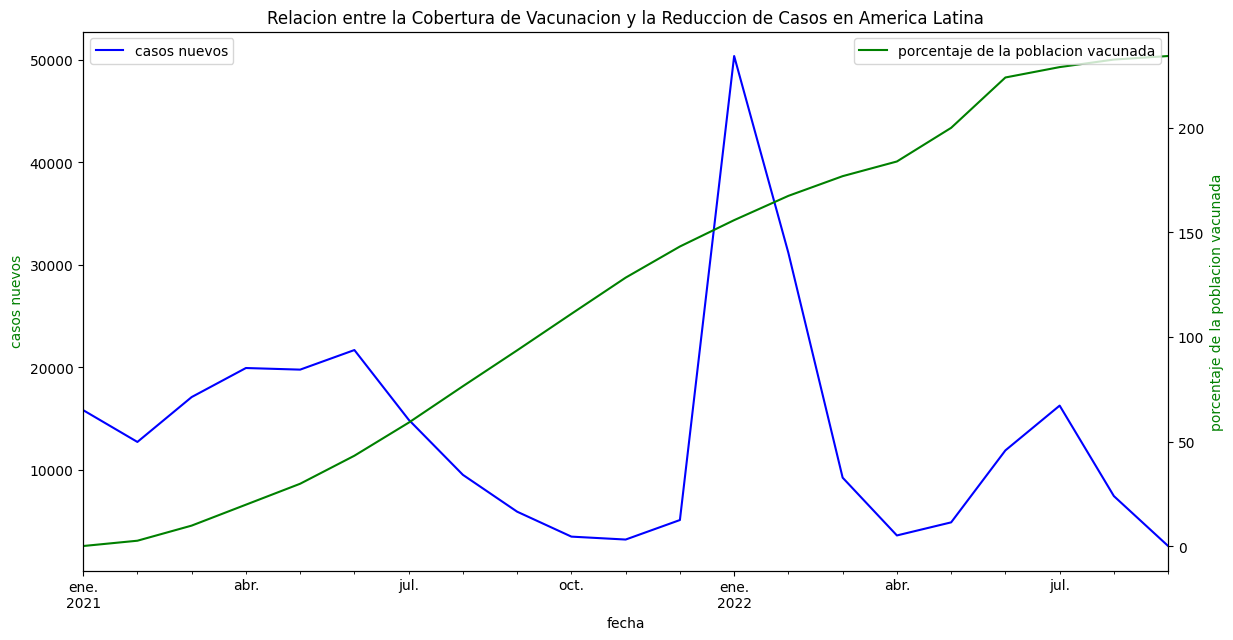

In [166]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Convertir la columna de fecha a la zona horaria UTC
df_Latam_cleaned.index = df_Latam_cleaned.index.tz_localize('UTC')

plt.figure(figsize=(14, 7))
ax1 = plt.gca()
ax2 = ax1.twinx()

# Calculamos el % de vacunación
df_Latam_cleaned['percentage_vaccinated'] = (df_Latam_cleaned['cumulative_vaccine_doses_administered'] / df_Latam_cleaned['population']) * 100

# Resample por mes
df_resampled = df_Latam_cleaned.resample('M').mean(numeric_only=True)

df_resampled['new_confirmed'].plot(ax=ax1, color='blue', label='casos nuevos')
df_resampled['percentage_vaccinated'].plot(ax=ax2, color='green', label='porcentaje de la poblacion vacunada')

ax1.set_xlabel('fecha')
ax1.set_ylabel('casos nuevos', color='green')
ax2.set_ylabel('porcentaje de la poblacion vacunada', color='green')
ax1.set_title('Relacion entre la Cobertura de Vacunacion y la Reduccion de Casos en America Latina')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()


Se puede ver al final que se correlaciona el mayor % de vacunacion acumulada con la merma al final del ciclo de nuevos casos.

# Como evoluciono la Mortalidad por COVID-19 en America Latina

C:\Users\sdcav\AppData\Local\Temp\ipykernel_20800\732421013.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_Latam_cleaned, x='date', y='mortality_rate', estimator='mean', ci=None)


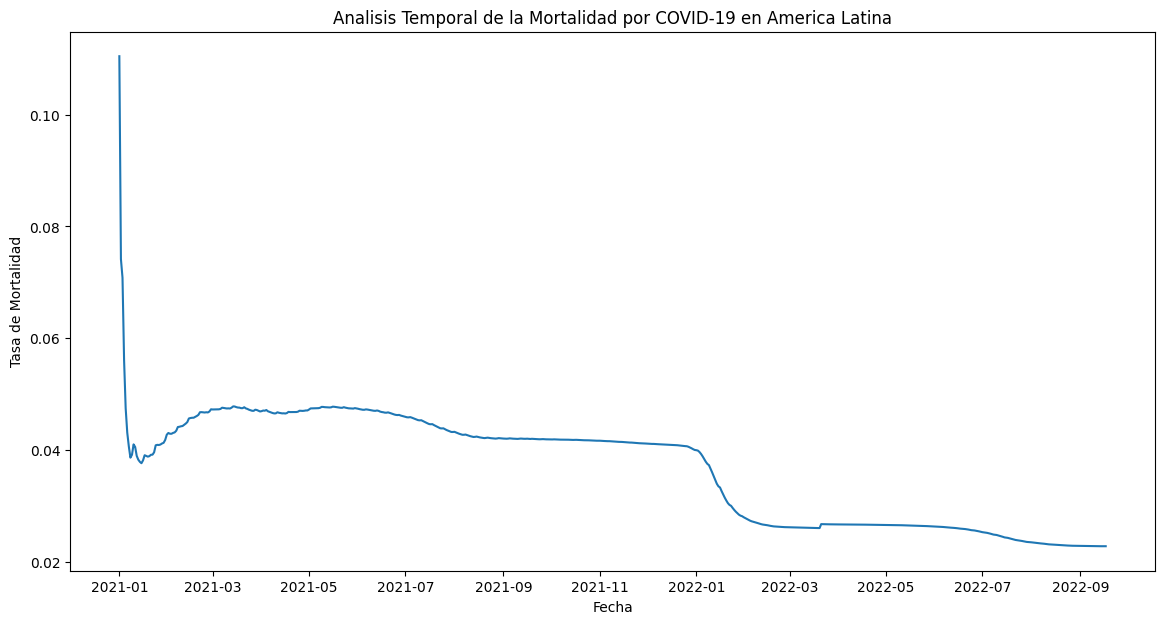

In [170]:
df_Latam_cleaned['mortality_rate'] = df_Latam_cleaned['cumulative_deceased']/df_Latam_cleaned['cumulative_confirmed']

plt.figure(figsize=(14, 7))
sns.lineplot(data=df_Latam_cleaned, x='date', y='mortality_rate', estimator='mean', ci=None)
plt.title('Analisis Temporal de la Mortalidad por COVID-19 en America Latina')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Mortalidad')
plt.show()

Se puede ver una fuerte caida entre enero y marzo de 2022 para seguir en una bajada sostenid

# Evolucion de casos Activos vs Recuperados en America Latina

C:\Users\sdcav\AppData\Local\Temp\ipykernel_20800\3820319514.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sns.lineplot(data=df_Latam_cleaned.resample('M').mean(numeric_only=True), x='date', y='active_cases', label='Casos Activos')
C:\Users\sdcav\AppData\Local\Temp\ipykernel_20800\3820319514.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sns.lineplot(data=df_Latam_cleaned.resample('M').mean(numeric_only=True), x='date', y='cumulative_recovered', label='Casos Recuperados')


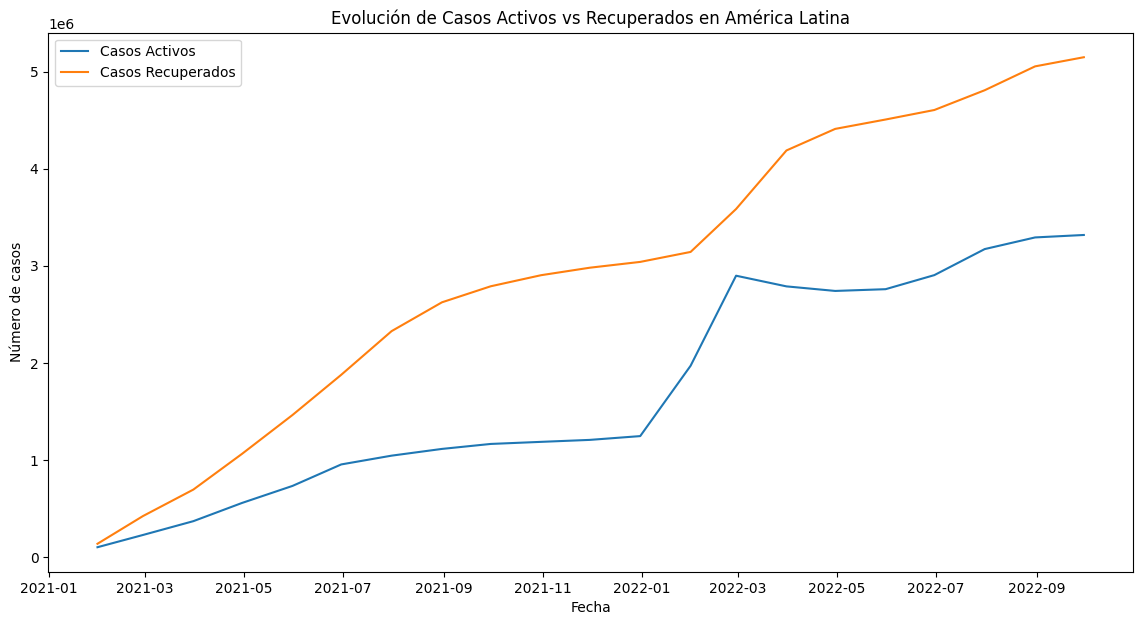

In [179]:
# Como evolucionaron los casos activos y recuperados en América Latina
df_Latam_cleaned['active_cases'] = df_Latam_cleaned['cumulative_confirmed'] - df_Latam_cleaned['cumulative_deceased'] - df_Latam_cleaned['cumulative_recovered']
plt.figure(figsize=(14, 7))

sns.lineplot(data=df_Latam_cleaned.resample('M').mean(numeric_only=True), x='date', y='active_cases', label='Casos Activos')
sns.lineplot(data=df_Latam_cleaned.resample('M').mean(numeric_only=True), x='date', y='cumulative_recovered', label='Casos Recuperados')

plt.xlabel('Fecha')
plt.ylabel('Número de casos')
plt.title('Evolución de Casos Activos vs Recuperados en América Latina')
plt.legend()
plt.show()


Faltaban muchos datos de New_recoverd, solo teniamos valores completos para Brazil y parcial para Colombia, la grafica no es muy representativa de los casos activos ya que faltaria restar muchos recuperados.

# Comparacion de la Situacion Actual de COVID-19 entre Paises de Latino America

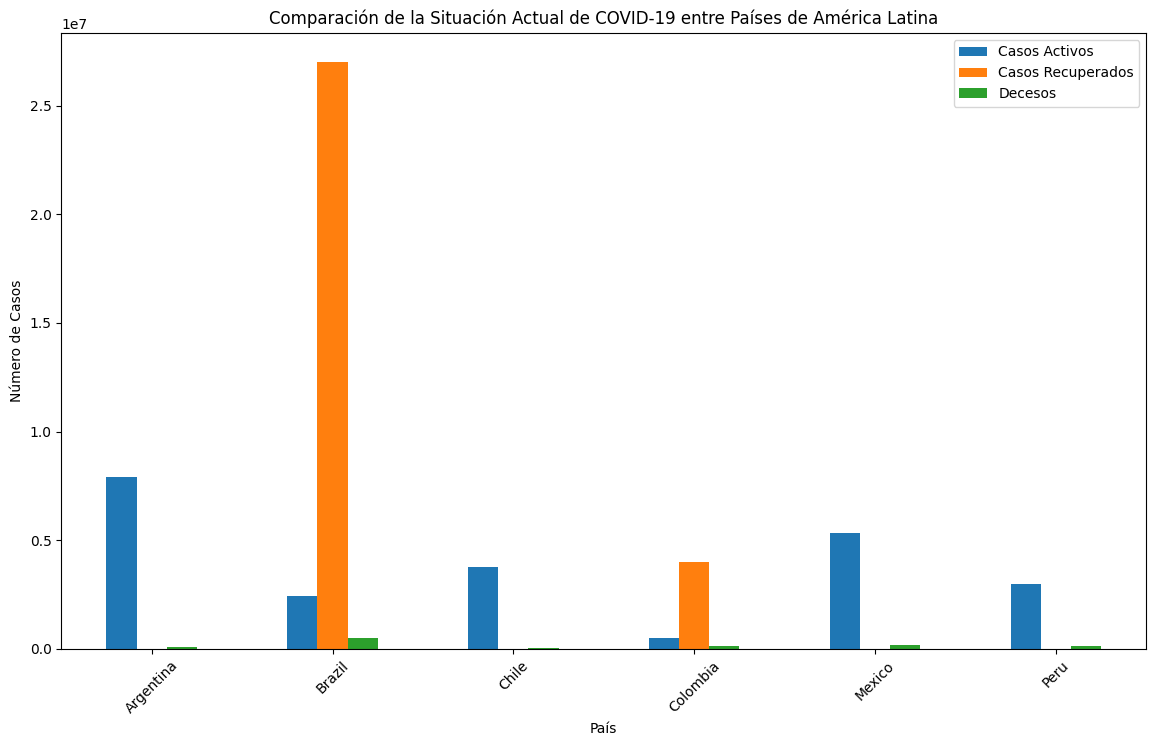

In [182]:
# Calcula las columnas 'active_cases', 'cumulative_recovered' y 'cumulative_deceased'
df_Latam_cleaned['active_cases'] = df_Latam_cleaned['cumulative_confirmed'] - df_Latam_cleaned['cumulative_deceased'] - df_Latam_cleaned['cumulative_recovered']

# Agrupa los datos por país y calcula los valores máximos
current_situation = df_Latam_cleaned.groupby('country_name').max()[['active_cases', 'cumulative_recovered', 'cumulative_deceased']]

# Grafica los datos
current_situation.plot(kind='bar', stacked=False, figsize=(14, 8))
plt.title('Comparación de la Situación Actual de COVID-19 entre Países de América Latina')
plt.xlabel('País')
plt.ylabel('Número de Casos')
plt.legend(['Casos Activos', 'Casos Recuperados', 'Decesos'])
plt.xticks(rotation=45)
plt.show()


# No se disponen de datos para realizar un buen analisis comparaitvo entre paises. Solo se puede evidenciar un importante proporcion de recuperados en Brazil y Colombia, y un minima porcion de decesos.

De acuerdo a la informacion general explorada se puede ir concluyendo que el pais mas conveniente podria resultar Brazil, en segundo lugar Mexico y en tercer lugar Colombia. Este orden obedece principalmente al gran volumen de contagios y casos confirmados. Seguiremos profundizando para fundamentar con mayor detalle.

In [184]:
df_Latam_cleaned.columns


Index(['Unnamed: 0', 'location_key', 'country_code', 'country_name',
       'new_confirmed', 'new_deceased', 'cumulative_confirmed',
       'cumulative_deceased', 'cumulative_vaccine_doses_administered',
       'population', 'population_male', 'population_female',
       'population_rural', 'population_urban', 'population_density',
       'human_development_index', 'population_age_00_09',
       'population_age_10_19', 'population_age_20_29', 'population_age_30_39',
       'population_age_40_49', 'population_age_50_59', 'population_age_60_69',
       'population_age_70_79', 'population_age_80_and_older', 'gdp_usd',
       'gdp_per_capita_usd', 'latitude', 'longitude', 'area_sq_km',
       'smoking_prevalence', 'diabetes_prevalence', 'infant_mortality_rate',
       'nurses_per_1000', 'physicians_per_1000', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'relative_humidity', 'population_largest_city',
       'area_

In [186]:
df_Latam_cleaned.to_csv("DatosLatinoamericaPBI.csv",sep= ',')